# Title: Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models

#### Group Member Names :
#### Urvish Mandaliya- 200538350
#### Naitra Sheth- 200542440
                            



### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
Comparing machine learning models for stock price prediction in-depth is the main goal of this study. We want to ascertain which methods are most successful in properly predicting stock prices by comparing the performance of different models on diverse datasets or models.

*********************************************************************************************************************
#### Github Repo: 
For full access to the code implementation, datasets, and detailed documentation, please refer to our GitHub repository: 

*********************************************************************************************************************
#### DESCRIPTION OF PAPER: 
Using a range of machine learning techniques, the research article "Stock Price Prediction using Machine Learning" explores the field of stock market forecasting. The study investigates the effectiveness of several models in forecasting stock values based on historical data through methodical testing and analysis.


*********************************************************************************************************************
#### PROBLEM STATEMENT :
Using machine learning techniques to accurately anticipate stock values is the main challenge this project attempts to solve. For traders, investors, and financial analysts, creating reliable models that can accurately predict stock prices is essential due to the complexity and volatility of financial markets.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
Within the field of stock market forecasting, the surrounding environment is complex and ever-changing. Numerous factors, such as economic statistics, geopolitical developments, corporate performance, investor mood, and regulatory changes, all have an impact on market dynamics. As a result, forecasting stock prices requires an awareness of and adjustment to this complex interaction of factors.

*********************************************************************************************************************
#### SOLUTION:
A variety of machine learning models, including as neural networks, Long Short-Term Memory (LSTM) networks, and Autoregressive Integrated Moving Average (ARIMA), are used to address the problem of stock price prediction. All of the models analyze past stock data to identify patterns and trends, which are then used to produce forecasts. Using well-established metrics like Mean Absolute Percentage Error (MAPE) and Root Mean Square Error (RMSE), the performance of these models is thoroughly assessed. The study attempts to determine which model is best for stock price prediction in various market scenarios by comparing several datasets.


# Background
*********************************************************************************************************************


| Reference | Explanation | Dataset/Input | Weakness |
|-----------|-------------|---------------|----------|
| [1] | Autoregressive Integrated Moving Average (ARIMA) is a time series forecasting model that incorporates the idea of differencing to make the input data stationary. It is widely used in finance for its simplicity and effectiveness in capturing linear dependencies in sequential data. | Historical stock price data | May struggle with capturing non-linear patterns and long-term dependencies in data. |
| [2] | Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) designed to overcome the vanishing gradient problem in traditional RNNs. LSTMs are well-suited for sequential data processing tasks due to their ability to retain information over long time intervals. | Historical stock price data | Requires a large amount of training data and computational resources, and may overfit on noisy or irregular data. |
| [3] | Neural networks, including feedforward neural networks and deep neural networks, offer a flexible framework for modeling complex relationships in data. They consist of multiple interconnected layers of neurons, each performing a nonlinear transformation of the input data. | Historical stock price data | Prone to overfitting, especially when dealing with high-dimensional data or insufficient training samples. |




*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************



## Data Preprossecing 

<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Data_Preprocessing_And_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing

##Data Loading

In [2]:
AAPL = pd.read_csv("Database/AAPL.csv")
TSLA = pd.read_csv("Database/TSLA.csv")
GOOG = pd.read_csv("Database/GOOG.csv")
MSFT = pd.read_csv("Database/MSFT.csv")
AMZN = pd.read_csv("Database/AMZN.csv")

##Apple

In [3]:
AAPL.head()

Date    Open    High     Low   Close  Adj. Close        Volume
0  26-Feb-2021  122.59  124.85  121.20  121.26      121.26  16,43,20,000
1  25-Feb-2021  124.68  126.46  120.54  120.99      120.99  14,73,06,500
2  24-Feb-2021  124.94  125.56  122.23  125.35      125.35  11,06,91,500
3  23-Feb-2021  123.76  126.71  118.39  125.86      125.86  15,78,59,100
4  22-Feb-2021  128.01  129.72  125.60  126.00      126.00  10,36,07,600

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9800 non-null   object 
 1   Open        9800 non-null   object 
 2   High        9725 non-null   float64
 3   Low         9725 non-null   float64
 4   Close       9725 non-null   float64
 5   Adj. Close  9725 non-null   float64
 6   Volume      9725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 536.1+ KB


In [5]:
# Drop NULL rows
AAPL.dropna(inplace = True)

In [6]:
# Change Dtype of Columns
AAPL["Date"] = pd.to_datetime(AAPL["Date"])
AAPL["Volume"] = AAPL["Volume"].str.replace(',', '')
AAPL = AAPL.astype({"Open": float, "Volume": float})

In [7]:
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)

In [8]:
# Drop rows having Date < '2015-01-01'
AAPL = AAPL[AAPL["Date"] >= '2015-01-01'].reset_index(drop = True)

In [9]:
AAPL.describe()

Date         Open         High          Low  \
count                           1549  1549.000000  1549.000000  1549.000000   
mean   2018-01-29 03:26:22.698515200    50.160265    50.700723    49.618696   
min              2015-01-02 00:00:00    22.500000    22.920000    22.370000   
25%              2016-07-18 00:00:00    30.000000    30.130000    29.810000   
50%              2018-01-30 00:00:00    42.020000    42.550000    41.630000   
75%              2019-08-14 00:00:00    55.100000    55.710000    54.370000   
max              2021-02-26 00:00:00   143.600000   145.090000   141.370000   
std                              NaN    28.029971    28.433917    27.552589   

             Close   Adj. Close        Volume  
count  1549.000000  1549.000000  1.549000e+03  
mean     50.182447    48.781143  1.449887e+08  
min      22.580000    21.130000  4.544800e+07  
25%      29.990000    27.910000  9.667000e+07  
50%      42.100000    40.600000  1.272076e+08  
75%      55.170000    53.980000  1.731832e+08  
max     143.160000   142.950000  6.488252e+08  
std      28.007536    28.560715  7.095025e+07

##Tesla

In [10]:
TSLA.head()

Date    Open    High     Low   Close  Adj. Close       Volume
0  26-Feb-2021  700.00  706.70  659.51  675.50      675.50  4,10,11,300
1  25-Feb-2021  726.15  737.21  670.58  682.22      682.22  3,86,19,900
2  24-Feb-2021  711.85  745.00  694.17  742.02      742.02  3,66,77,100
3  23-Feb-2021  662.13  713.61  619.00  698.84      698.84  6,63,97,000
4  22-Feb-2021  762.64  768.50  710.20  714.50      714.50  3,70,11,700

In [11]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2686 non-null   object 
 1   Open        2686 non-null   object 
 2   High        2685 non-null   float64
 3   Low         2685 non-null   float64
 4   Close       2685 non-null   float64
 5   Adj. Close  2685 non-null   float64
 6   Volume      2685 non-null   object 
dtypes: float64(4), object(3)
memory usage: 147.0+ KB


In [12]:
# Drop NULL rows
TSLA.dropna(inplace = True)

In [13]:
# Change Dtype of Columns
TSLA["Date"] = pd.to_datetime(TSLA["Date"])
TSLA["Volume"] = TSLA["Volume"].str.replace(',', '')
TSLA = TSLA.astype({"Open": float, "Volume": float})

In [14]:
# Sort the Database by Date
TSLA = TSLA.sort_values(by = 'Date', ignore_index = True)

In [15]:
# Drop rows having Date < '2015-01-01'
TSLA = TSLA[TSLA["Date"] >= '2015-01-01'].reset_index(drop = True)

In [16]:
TSLA.describe()

Date         Open         High          Low  \
count                           1549  1549.000000  1549.000000  1549.000000   
mean   2018-01-29 03:26:22.698515200   110.810891   113.270362   108.205281   
min              2015-01-02 00:00:00    28.460000    30.990000    28.210000   
25%              2016-07-18 00:00:00    45.760000    46.310000    44.990000   
50%              2018-01-30 00:00:00    57.600000    59.000000    56.560000   
75%              2019-08-14 00:00:00    70.510000    71.440000    69.250000   
max              2021-02-26 00:00:00   891.380000   900.400000   871.600000   
std                              NaN   157.089086   160.828238   152.917803   

             Close   Adj. Close        Volume  
count  1549.000000  1549.000000  1.549000e+03  
mean    110.953628   110.953628  3.992077e+07  
min      28.730000    28.730000  3.540000e+06  
25%      45.700000    45.700000  2.127200e+07  
50%      57.930000    57.930000  3.079200e+07  
75%      70.360000    70.360000  4.735750e+07  
max     883.090000   883.090000  3.046940e+08  
std     157.395272   157.395272  2.937944e+07

##Google

In [17]:
GOOG.head()

Date      Open      High       Low     Close Adj. Close     Volume
0  26-Feb-2021  2,050.52  2,071.01  2,016.06  2,036.86   2,036.86  20,83,500
1  25-Feb-2021  2,067.45  2,094.88  2,021.29  2,031.36   2,031.36  18,26,000
2  24-Feb-2021  2,041.83  2,100.78  2,038.13  2,095.17   2,095.17  12,47,400
3  23-Feb-2021  2,025.01  2,082.01  2,002.02  2,070.86   2,070.86  16,66,500
4  22-Feb-2021  2,067.00  2,091.42  2,062.14  2,064.88   2,064.88  13,66,200

In [18]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        4162 non-null   object
 1   Open        4162 non-null   object
 2   High        4160 non-null   object
 3   Low         4160 non-null   object
 4   Close       4160 non-null   object
 5   Adj. Close  4160 non-null   object
 6   Volume      4160 non-null   object
dtypes: object(7)
memory usage: 227.7+ KB


In [19]:
# Drop NULL rows
GOOG.dropna(inplace = True)

In [20]:
# Change Dtype of Columns
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  GOOG[col] = GOOG[col].str.replace(',', '')

GOOG = GOOG.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [21]:
# Sort the Database by Date
GOOG = GOOG.sort_values(by = 'Date', ignore_index = True)

In [22]:
# Drop rows having Date < '2015-01-01'
GOOG = GOOG[GOOG["Date"] >= '2015-01-01'].reset_index(drop = True)

In [23]:
GOOG.describe()

Date         Open         High          Low  \
count                           1549  1549.000000  1549.000000  1549.000000   
mean   2018-01-29 03:26:22.698515200  1030.784235  1041.013719  1021.141375   
min              2015-01-02 00:00:00   493.300000   494.620000   486.230000   
25%              2016-07-18 00:00:00   756.540000   764.230000   750.000000   
50%              2018-01-30 00:00:00  1037.490000  1049.480000  1023.140000   
75%              2019-08-14 00:00:00  1207.140000  1219.760000  1200.130000   
max              2021-02-26 00:00:00  2119.270000  2152.680000  2104.360000   
std                              NaN   335.922147   340.932426   332.354344   

             Close   Adj. Close        Volume  
count  1549.000000  1549.000000  1.549000e+03  
mean   1031.490529  1031.490529  1.735614e+06  
min     491.200000   491.200000  3.468000e+05  
25%     758.090000   758.090000  1.241200e+06  
50%    1037.080000  1037.080000  1.525200e+06  
75%    1208.670000  1208.670000  1.972100e+06  
max    2128.310000  2128.310000  1.116490e+07  
std     336.823772   336.823772  8.338749e+05

##Microsoft

In [24]:
MSFT.head()

Date    Open    High     Low   Close  Adj. Close       Volume
0  26-Feb-2021  231.53  235.37  229.54  232.38      232.38  3,78,11,200
1  25-Feb-2021  232.08  234.59  227.88  228.99      228.99  3,94,81,600
2  24-Feb-2021  230.01  235.20  229.00  234.55      234.55  2,63,01,400
3  23-Feb-2021  230.33  234.83  228.73  233.27      233.27  3,01,91,200
4  22-Feb-2021  237.42  237.93  232.40  234.51      234.51  3,64,23,100

In [25]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8890 entries, 0 to 8889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8890 non-null   object 
 1   Open        8890 non-null   object 
 2   High        8812 non-null   float64
 3   Low         8812 non-null   float64
 4   Close       8812 non-null   float64
 5   Adj. Close  8812 non-null   float64
 6   Volume      8812 non-null   object 
dtypes: float64(4), object(3)
memory usage: 486.3+ KB


In [26]:
# Drop NULL rows
MSFT.dropna(inplace = True)

In [27]:
# Change Dtype of Columns
MSFT["Date"] = pd.to_datetime(MSFT["Date"])
MSFT["Open"] = MSFT["Open"].str.replace(',', '')
MSFT["Volume"] = MSFT["Volume"].str.replace(',', '')
MSFT = MSFT.astype({"Open": float, "Volume": float})

In [28]:
# Sort the Database by Date
MSFT = MSFT.sort_values(by = 'Date', ignore_index = True)

In [29]:
# Drop rows having Date < '2015-01-01'
MSFT = MSFT[MSFT["Date"] >= '2015-01-01'].reset_index(drop = True)

In [30]:
MSFT.describe()

Date         Open        High          Low  \
count                           1549  1549.000000  1549.00000  1549.000000   
mean   2018-01-29 03:26:22.698515200   102.995320   103.99847   101.948806   
min              2015-01-02 00:00:00    40.340000    40.74000    39.720000   
25%              2016-07-18 00:00:00    56.080000    56.63000    55.610000   
50%              2018-01-30 00:00:00    89.800000    90.88000    88.400000   
75%              2019-08-14 00:00:00   137.190000   138.35000   135.930000   
max              2021-02-26 00:00:00   245.030000   246.13000   242.920000   
std                              NaN    55.125024    55.79860    54.423005   

             Close   Adj. Close        Volume  
count  1549.000000  1549.000000  1.549000e+03  
mean    103.031343    99.744235  3.053693e+07  
min      40.290000    35.810000  7.425600e+06  
25%      56.190000    51.520000  2.146110e+07  
50%      89.710000    85.960000  2.696110e+07  
75%     137.080000   134.800000  3.475450e+07  
max     244.990000   244.430000  1.691640e+08  
std      55.144477    56.333505  1.474586e+07

##Amazon

In [31]:
AMZN.head()

Date      Open      High       Low     Close Adj. Close     Volume
0  26-Feb-2021  3,095.20  3,122.44  3,036.70  3,092.93   3,092.93  42,73,500
1  25-Feb-2021  3,136.74  3,178.26  3,047.76  3,057.16   3,057.16  45,07,100
2  24-Feb-2021  3,166.75  3,171.23  3,125.38  3,159.53   3,159.53  30,03,000
3  23-Feb-2021  3,127.03  3,204.73  3,093.60  3,194.50   3,194.50  46,69,500
4  22-Feb-2021  3,208.13  3,232.32  3,172.26  3,180.74   3,180.74  35,04,600

In [32]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5989 non-null   object
 1   Open        5989 non-null   object
 2   High        5986 non-null   object
 3   Low         5986 non-null   object
 4   Close       5986 non-null   object
 5   Adj. Close  5986 non-null   object
 6   Volume      5986 non-null   object
dtypes: object(7)
memory usage: 327.7+ KB


In [33]:
# Drop NULL rows
AMZN.dropna(inplace = True)

In [34]:
# Change Dtype of Columns
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  AMZN[col] = AMZN[col].str.replace(',', '')

AMZN = AMZN.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [35]:
# Sort the Database by Date
AMZN = AMZN.sort_values(by = 'Date', ignore_index = True)

In [36]:
# Drop rows having Date < '2015-01-01'
AMZN = AMZN[AMZN["Date"] >= '2015-01-01'].reset_index(drop = True)

In [37]:
AMZN.describe()

Date         Open         High          Low  \
count                           1549  1549.000000  1549.000000  1549.000000   
mean   2018-01-29 03:26:22.698515200  1423.236514  1438.067463  1406.292744   
min              2015-01-02 00:00:00   286.280000   290.790000   285.250000   
25%              2016-07-18 00:00:00   740.140000   746.100000   732.750000   
50%              2018-01-30 00:00:00  1368.000000  1396.030000  1344.010000   
75%              2019-08-14 00:00:00  1852.690000  1871.320000  1832.650000   
max              2021-02-26 00:00:00  3547.000000  3552.250000  3486.690000   
std                              NaN   834.372402   844.761504   822.021255   

             Close   Adj. Close        Volume  
count  1549.000000  1549.000000  1.549000e+03  
mean   1422.724538  1422.724538  4.301081e+06  
min     286.950000   286.950000  8.813000e+05  
25%     739.610000   739.610000  2.865900e+06  
50%    1371.990000  1371.990000  3.718100e+06  
75%    1858.000000  1858.000000  5.070300e+06  
max    3531.450000  3531.450000  2.385610e+07  
std     833.312139   833.312139  2.204558e+06

#Exploratory Data Analysis

In [38]:
Companies = [AAPL, TSLA, GOOG, MSFT, AMZN]
Companies_Title = ["Apple", "Tesla", "Google", "Microsoft", "Amazon"]

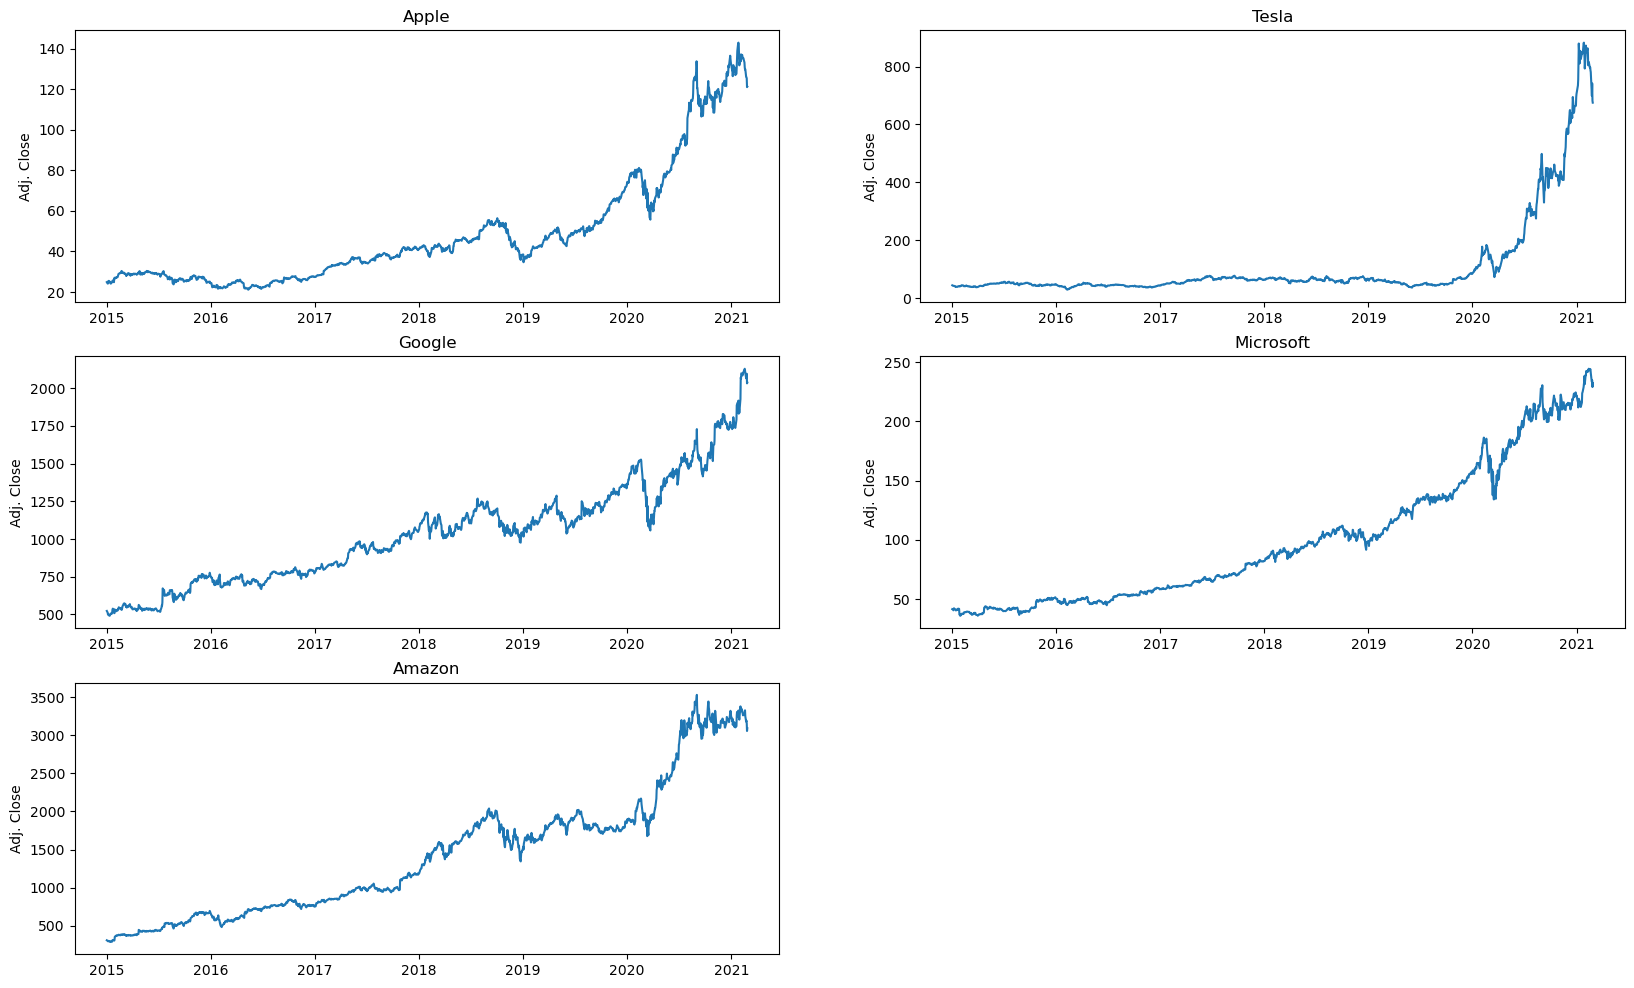

In [39]:
# Lets view historical view of the closing prices

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Adj. Close')

We can see from the  above graph that Telsa shares have tremendous growth in the 2020-2021 period.

If we follow the news, it can be due to


1.   Emission Credit Sales
2.   Tesla entering the Fast-Growing Compact SUV Market
3.   Starting production in China

For the rest of the Companies, we can see that COVID-19 is the primary factor affecting the 2020-2021 period.



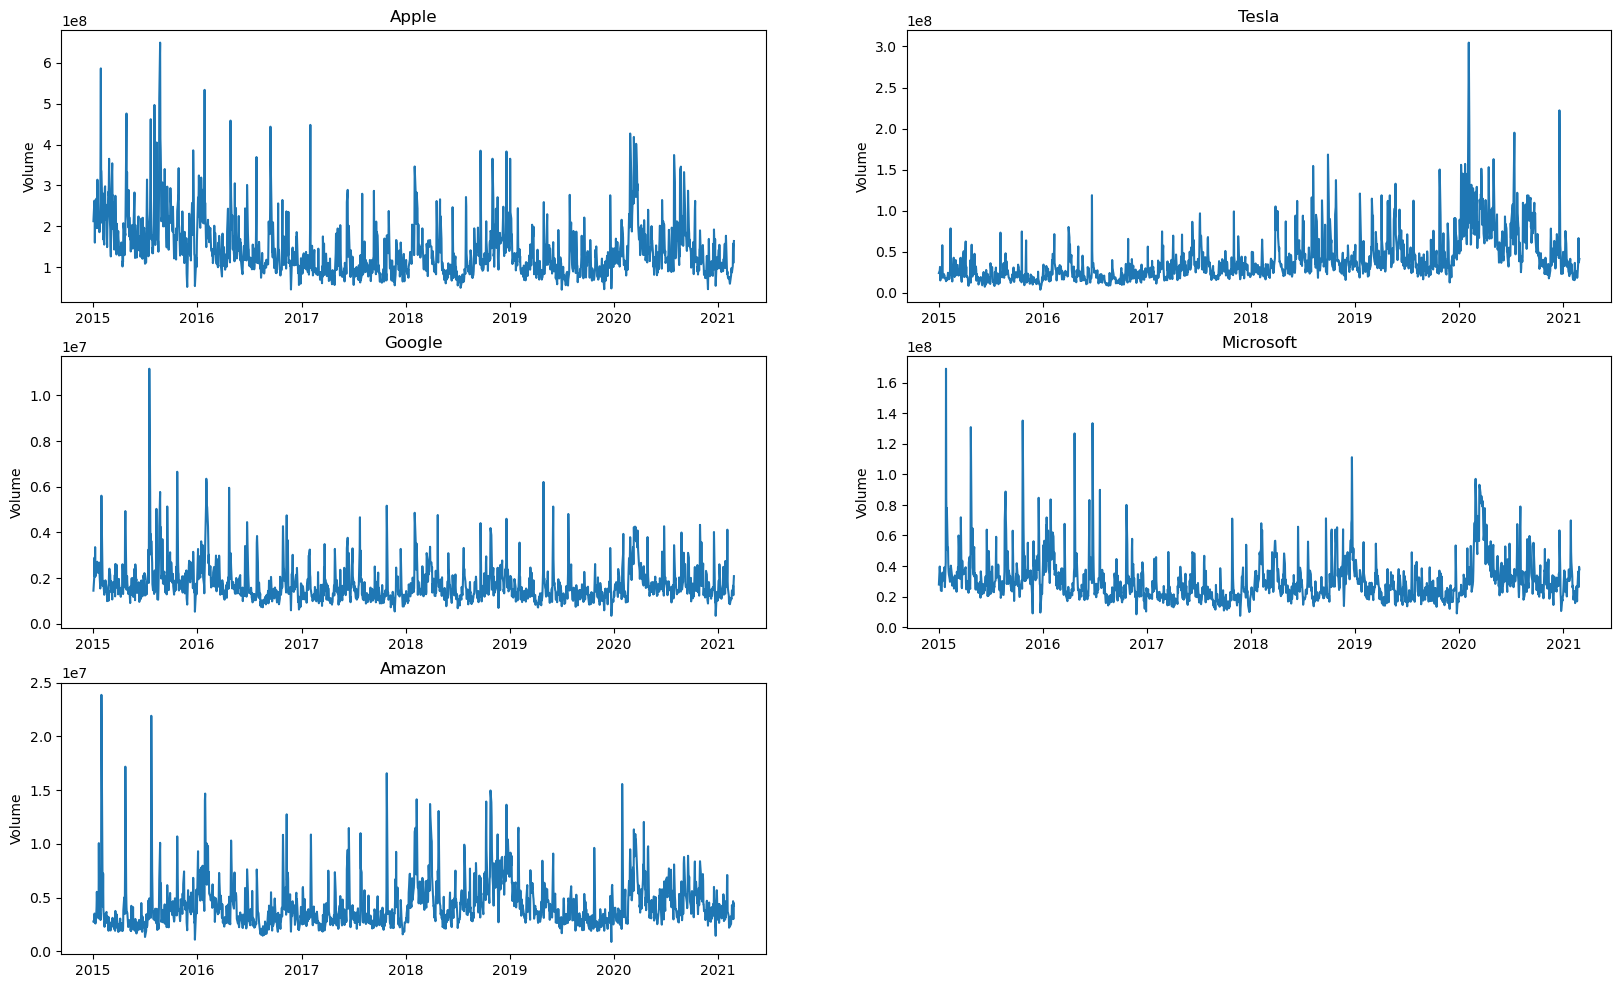

In [40]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Volume"])
  plt.title(Companies_Title[index])
  plt.ylabel('Volume')

Now, we have seen the visualizations for the closing price and volume traded each day, let's go ahead and calculate the moving average of the stock.

### What was the moving average of the various stocks ?

In [41]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Adj. Close"].rolling(Moving_Average).mean()

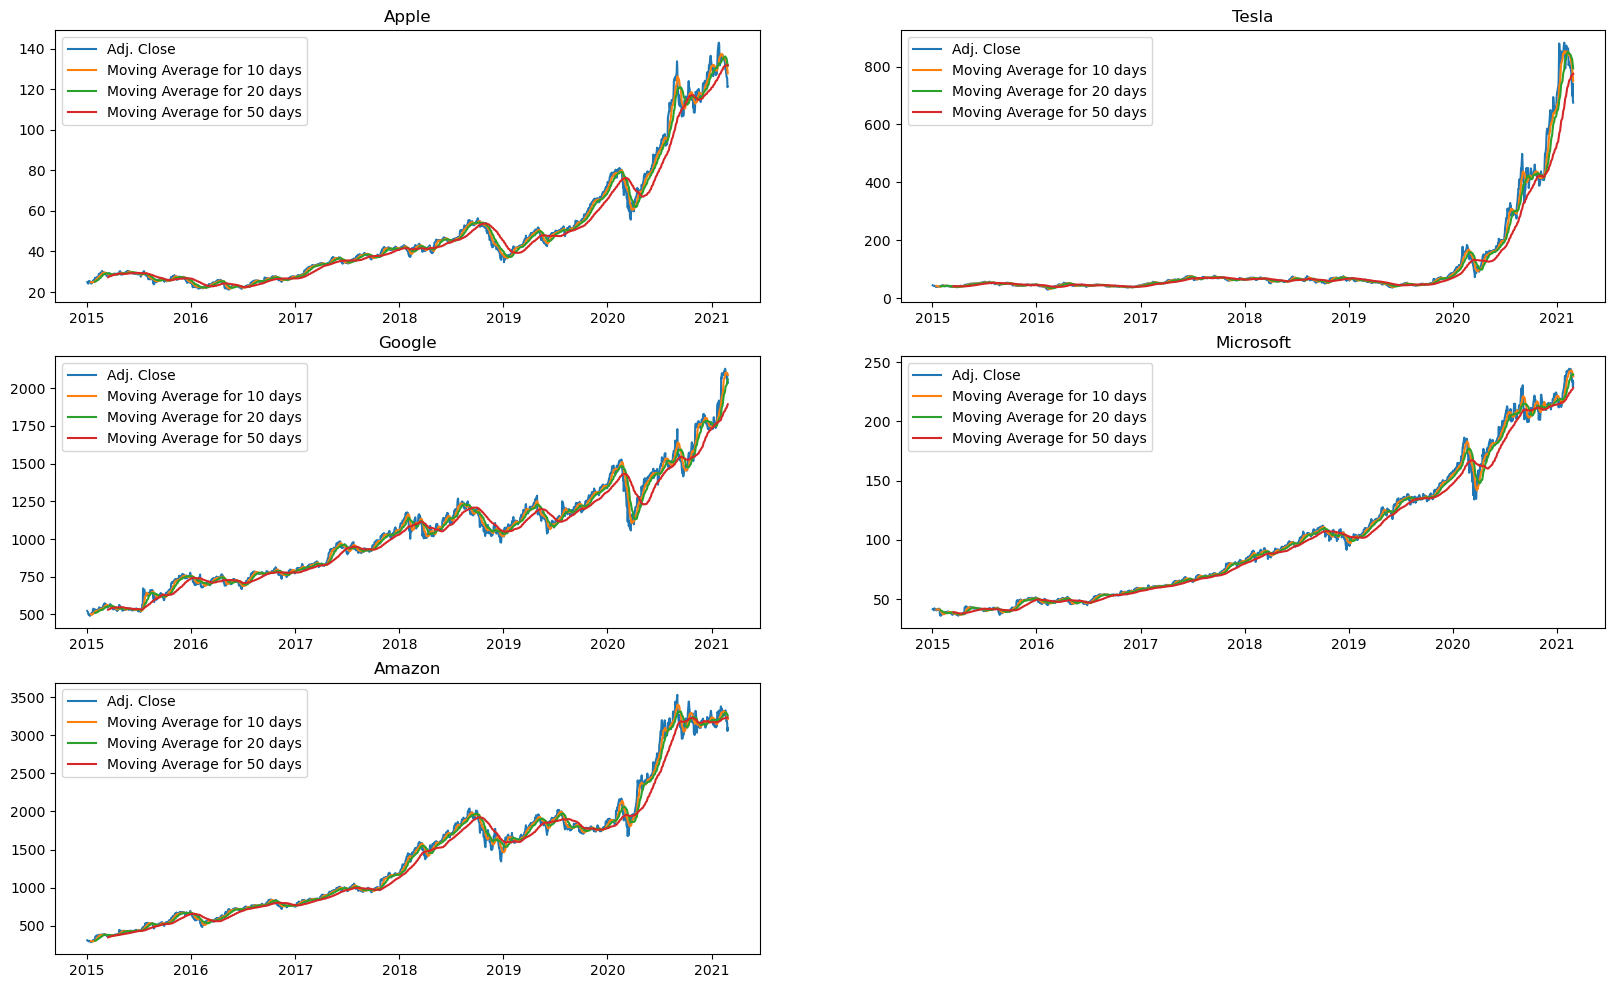

In [42]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.plot(company["Date"], company["Moving Average for 10 days"])
  plt.plot(company["Date"], company["Moving Average for 20 days"])
  plt.plot(company["Date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [43]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 

for company in Companies:
  company["Daily Return"] = company["Adj. Close"].pct_change()

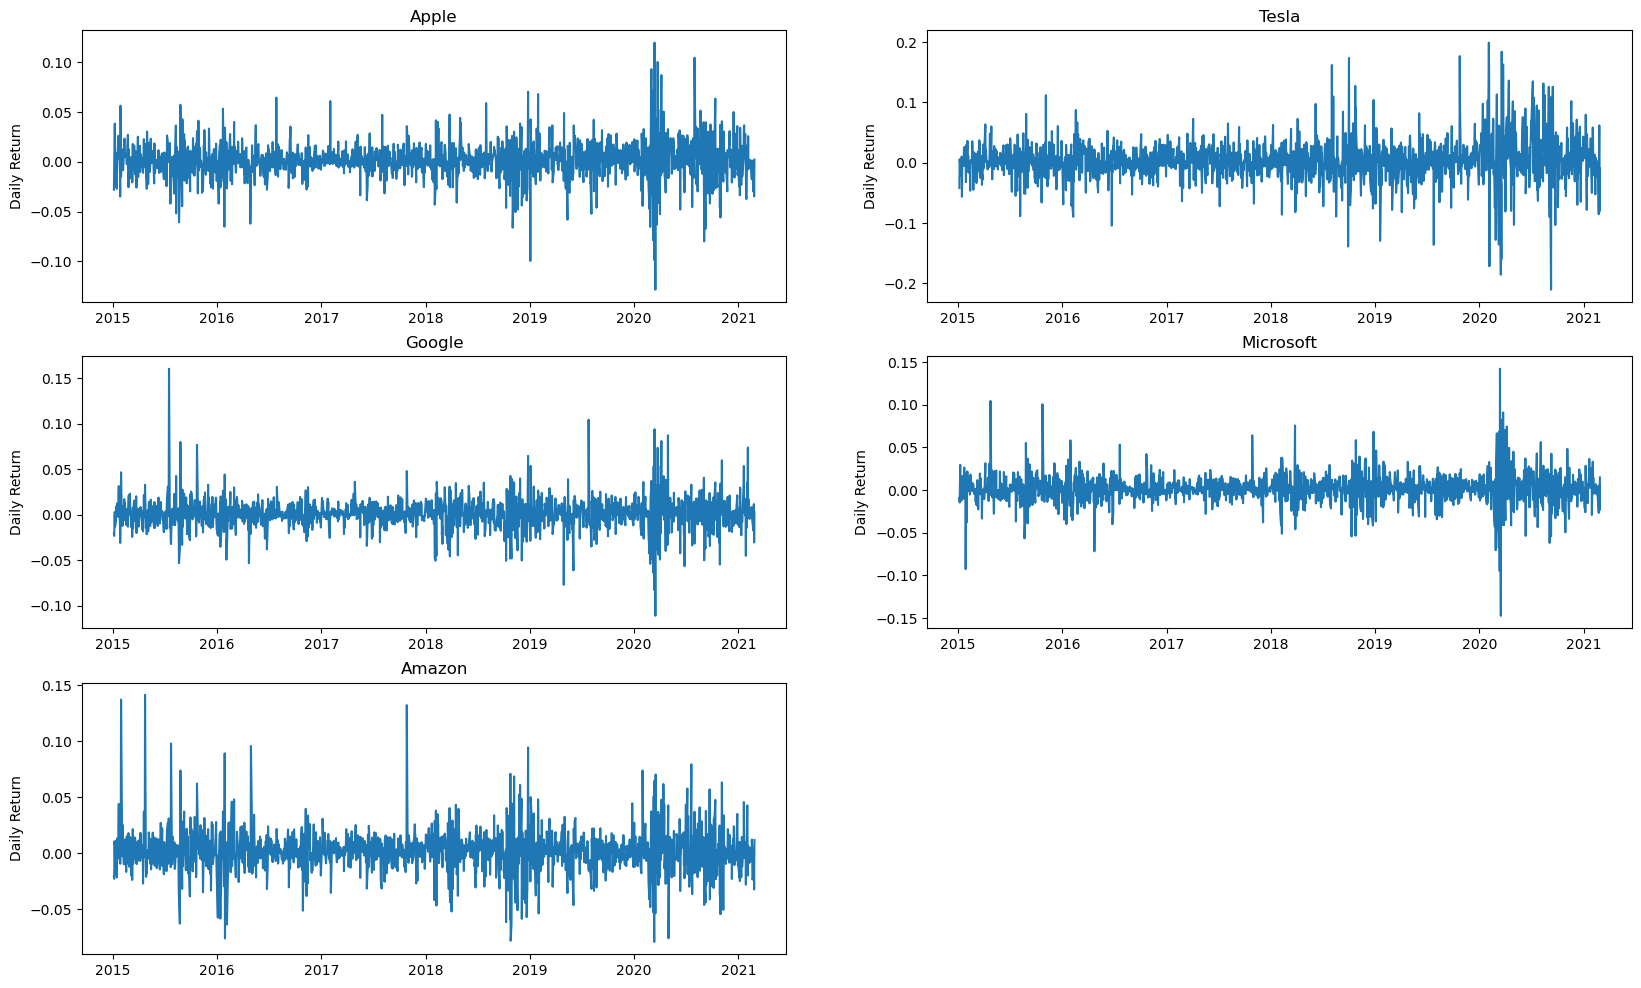

In [44]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

Now, let's get an overall at the average daily return using a histogram.

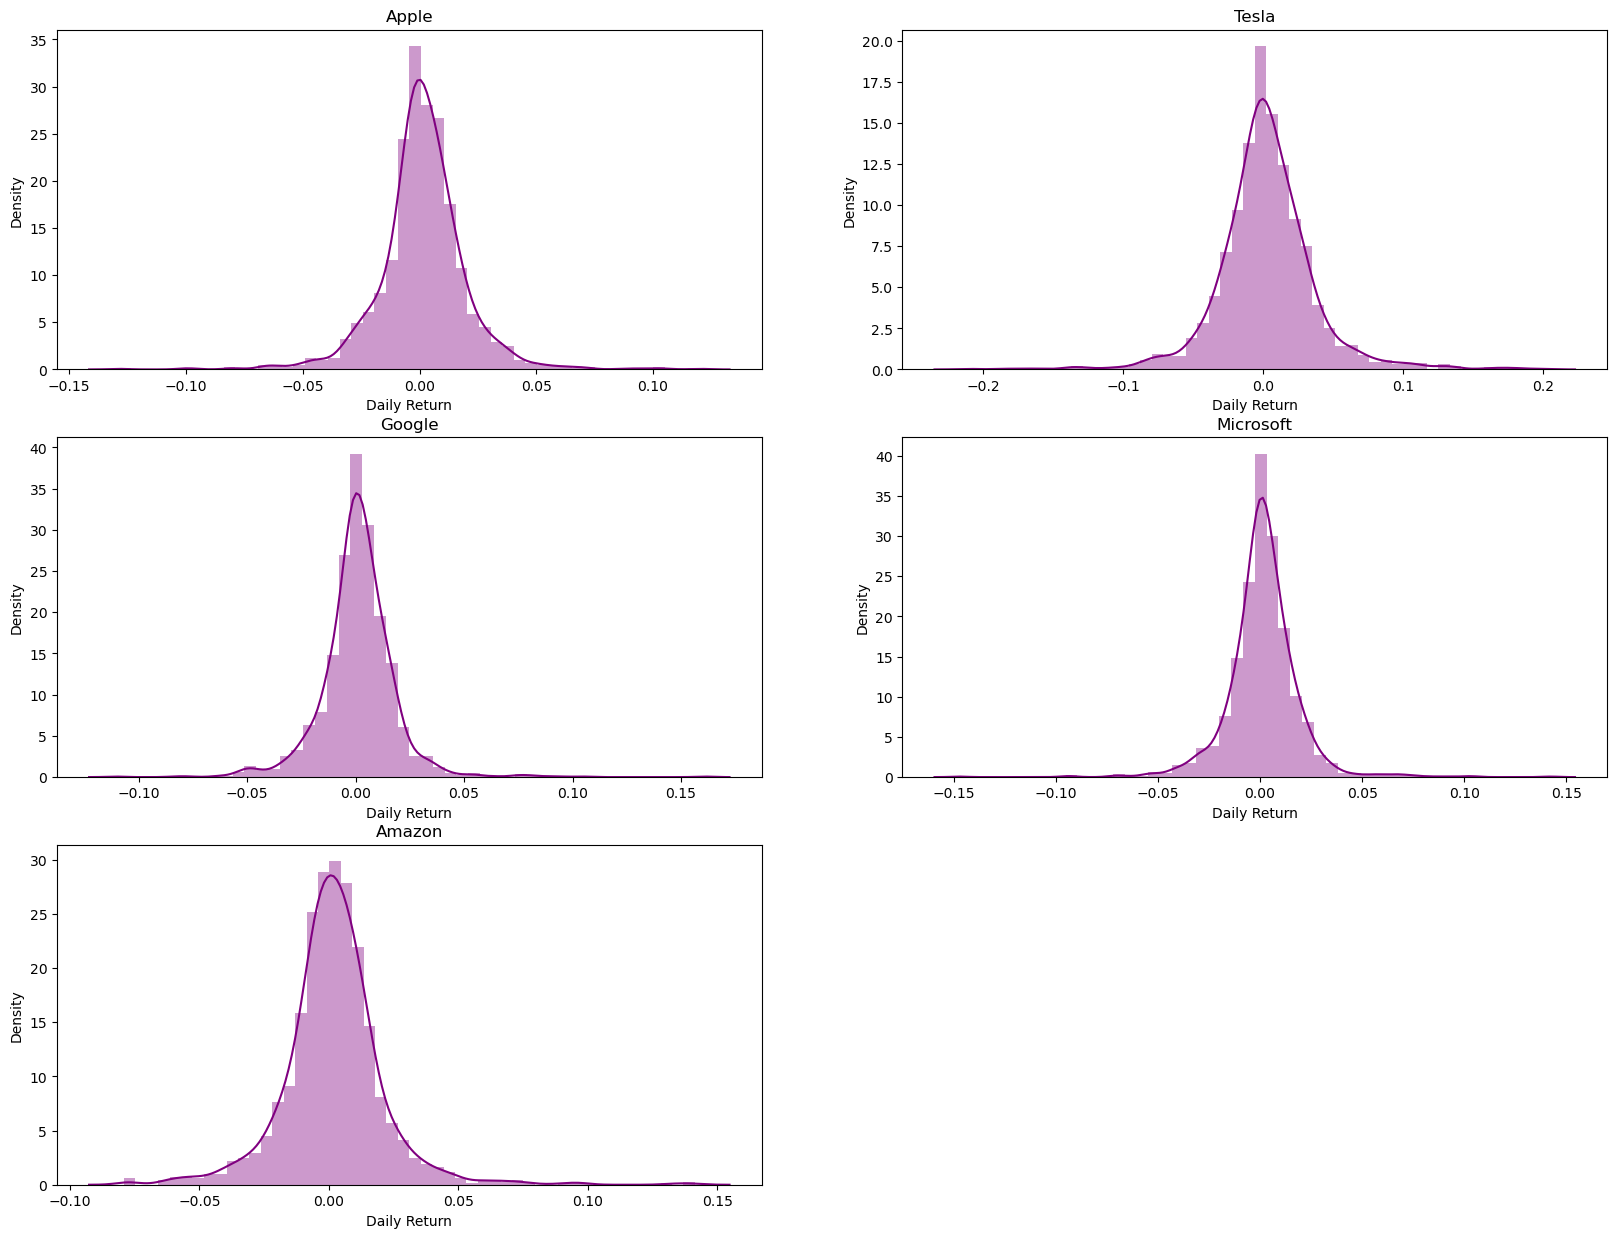

In [45]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [46]:
print("Kurtosis Value")
for index, company in enumerate(Companies):
  print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 6.405686938843391
Tesla: 5.764945983385828
Google: 10.086026546409723
Microsoft: 10.603491741447666
Amazon: 7.135284710744968


The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

### What was the correlation between diffrent stocks closing price ?

In [47]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["AAPL"] = AAPL["Adj. Close"]
Companies_returns["TSLA"] = TSLA["Adj. Close"]
Companies_returns["GOOG"] = GOOG["Adj. Close"]
Companies_returns["MSFT"] = MSFT["Adj. Close"]
Companies_returns["AMZN"] = AMZN["Adj. Close"]
Companies_returns.head()

AAPL   TSLA    GOOG   MSFT    AMZN
0  24.86  43.86  523.37  41.44  308.52
1  24.16  42.02  512.46  41.06  302.19
2  24.16  42.26  500.59  40.46  295.29
3  24.50  42.19  499.73  40.97  298.42
4  25.44  42.12  501.30  42.18  300.46

In [48]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

AAPL      TSLA      GOOG      MSFT      AMZN
0       NaN       NaN       NaN       NaN       NaN
1 -0.028158 -0.041952 -0.020846 -0.009170 -0.020517
2  0.000000  0.005712 -0.023163 -0.014613 -0.022833
3  0.014073 -0.001656 -0.001718  0.012605  0.010600
4  0.038367 -0.001659  0.003142  0.029534  0.006836

Now, let's do a correlation plot, to get actual numerical values for the correlation between the stocks closing price

<Axes: >

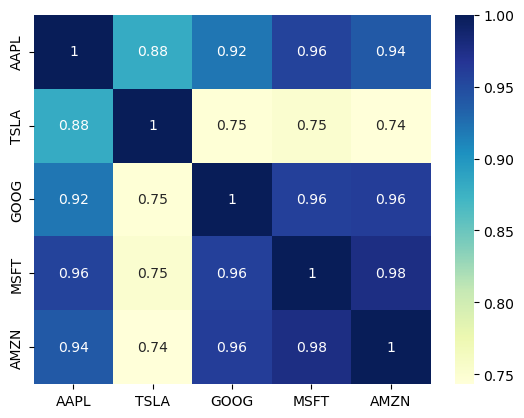

In [49]:
sns.heatmap(Companies_returns.corr(), annot=True, cmap="YlGnBu")

Finally, let's do a correlation plot, to get actual numerical values for the correlation between the stocks daily returns.

<Axes: >

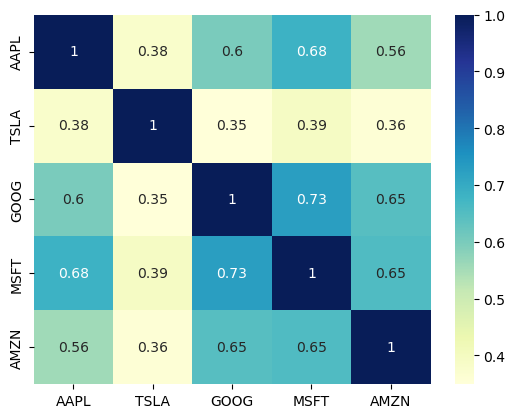

In [50]:
sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="YlGnBu")

From the above plot, we can see that Microsoft and Google had the strongest correlation in stocks daily returns.

### How much value do we put at risk by investing in a paticular stock ?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

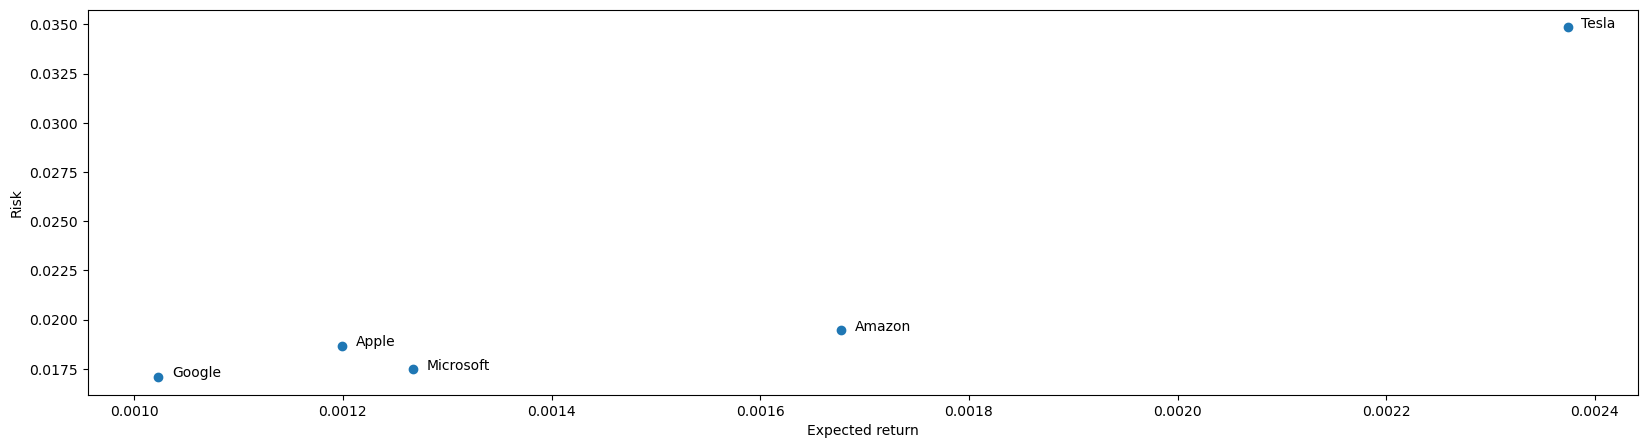

In [51]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies_Title, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')

From the above graph, we can see that Tesla has the highest expected returns and the highest risk factor. Google has the lowest expected returns and the lowest risk factor.

## ARIMA_MODEL

<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
AAPL = pd.read_csv("Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("Database/Pre_Processed_AMZN.csv")

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series and help us understand if the series is stationary.

**Null Hypothesis**: The series has a unit root

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the Null Hypothesis, then the series is non-stationary.

In [4]:
def Test_Stationarity(timeseries):
  result = adfuller(timeseries['Adj. Close'], autolag = 'AIC')
  print("Results of Dickey Fuller Test")
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Number of lags used: {result[2]}')
  print(f'Number of observations used: {result[3]}')
  for key, value in result[4].items():
    print(f'critical value ({key}): {value}')

#Apple

In [5]:
AAPL.head()

Date   Open   High    Low  Close  Adj. Close       Volume
0  2015-01-02  27.85  27.86  26.84  27.33       24.86  212818400.0
1  2015-01-05  27.07  27.16  26.35  26.56       24.16  257142000.0
2  2015-01-06  26.64  26.86  26.16  26.57       24.16  263188400.0
3  2015-01-07  26.80  27.05  26.67  26.94       24.50  160423600.0
4  2015-01-08  27.31  28.04  27.17  27.97       25.44  237458000.0

In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [7]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

In [8]:
Test_Stationarity(AAPL)

Results of Dickey Fuller Test
Test Statistics: 1.1207222064433586
p-value: 0.9953896550774386
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

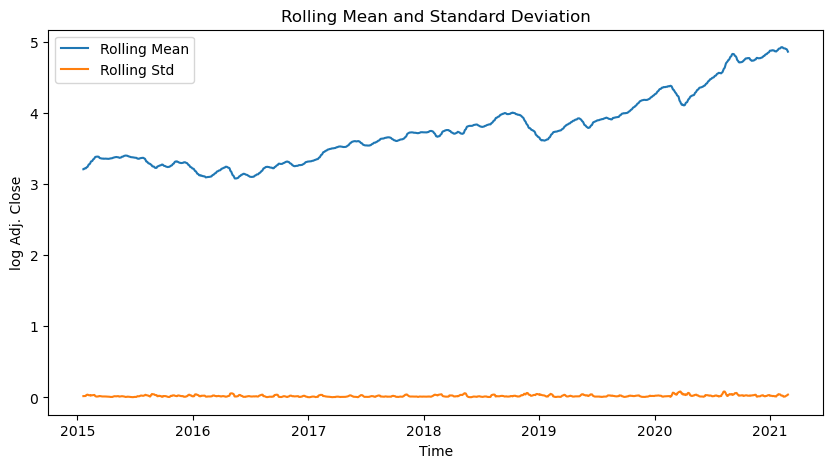

In [9]:
AAPL['log Adj. Close'] = np.log(AAPL['Adj. Close'])
AAPL_log_moving_avg = AAPL['log Adj. Close'].rolling(12).mean()
AAPL_log_std = AAPL['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(AAPL['Date'], AAPL_log_moving_avg, label = "Rolling Mean")
plt.plot(AAPL['Date'], AAPL_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set

    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26







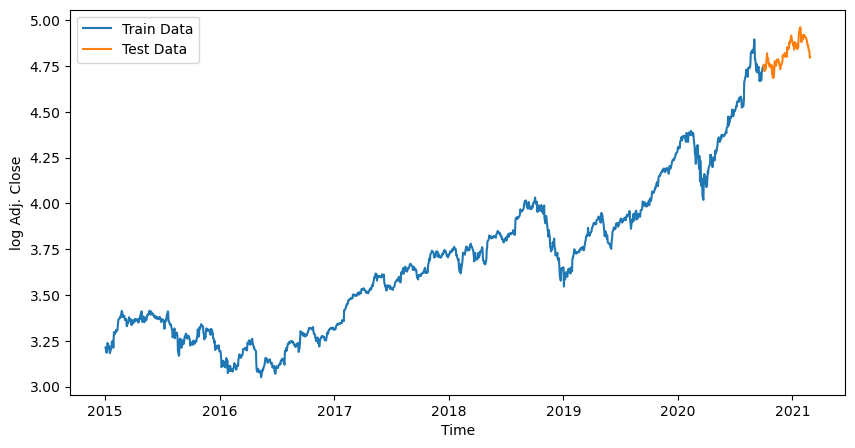

In [10]:
AAPL_Train_Data = AAPL[AAPL['Date'] < '2020-10-01']
AAPL_Test_Data = AAPL[AAPL['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(AAPL_Train_Data['Date'], AAPL_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(AAPL_Test_Data['Date'], AAPL_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

###Modeling

In [11]:
AAPL_Auto_ARIMA_Model = auto_arima(AAPL_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(AAPL_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3721.627
Date:                Thu, 18 Apr 2024   AIC                          -7437.254
Time:                        18:08:37   BIC                          -7421.424
Sample:                             0   HQIC                         -7431.346
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.366      0.018       0.000       0.002
ar.L1         -0.0981      0.015     -6.535      0.000      -0.127      -0.069
sigma2         0.0003   6.51e-06     52.314      0.0

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
AAPL_ARIMA_Model = ARIMA(AAPL_Train_Data['log Adj. Close'], order=(1, 1, 0))
AAPL_ARIMA_Model_Fit = AAPL_ARIMA_Model.fit()

# Print the summary of the model
print(AAPL_ARIMA_Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1447
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3718.749
Date:                Thu, 18 Apr 2024   AIC                          -7433.498
Time:                        18:09:54   BIC                          -7422.945
Sample:                             0   HQIC                         -7429.560
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0944      0.015     -6.302      0.000      -0.124      -0.065
sigma2         0.0003   6.51e-06     52.451      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

###Predicting the closing stock price of Apple

In [15]:
print(AAPL_output)

1447    4.747333
1448    4.747467
1449    4.747454
1450    4.747456
1451    4.747455
          ...   
1544    4.747455
1545    4.747455
1546    4.747455
1547    4.747455
1548    4.747455
Name: predicted_mean, Length: 102, dtype: float64


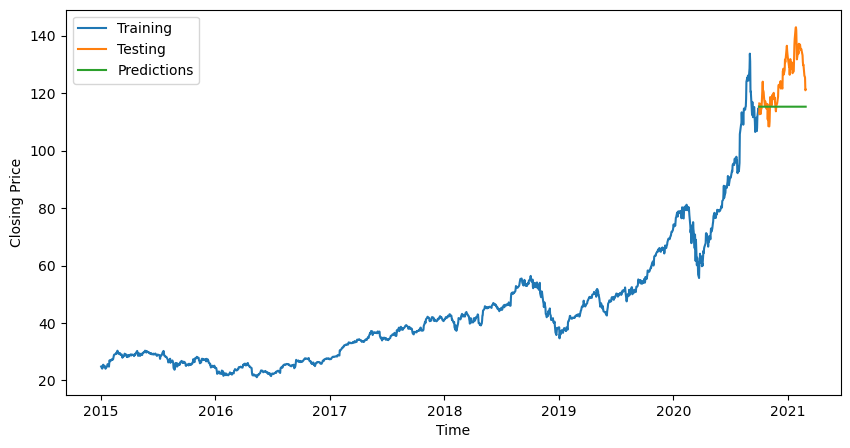

In [16]:
# Convert the forecasted values to numpy array and then to their exponent to reverse the log transformation
AAPL_predictions = np.exp(AAPL_output.to_numpy())

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(AAPL_Train_Data['Date'], AAPL_Train_Data['Adj. Close'], label='Training')
plt.plot(AAPL_Test_Data['Date'], AAPL_Test_Data['Adj. Close'], label='Testing')
plt.plot(AAPL_Test_Data['Date'], AAPL_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [17]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Data['Adj. Close'], AAPL_predictions))
mape = np.mean(np.abs(AAPL_predictions - AAPL_Test_Data['Adj. Close'])/np.abs(AAPL_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 12.483579699171873
MAPE: 0.07613730236152583


#Tesla

In [18]:
TSLA.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  44.57  44.65  42.65  43.86       43.86  23822000.0
1  2015-01-05  42.91  43.30  41.43  42.02       42.02  26842500.0
2  2015-01-06  42.01  42.84  40.84  42.26       42.26  31309500.0
3  2015-01-07  42.67  42.96  41.96  42.19       42.19  14842000.0
4  2015-01-08  42.56  42.76  42.00  42.12       42.12  17212500.0

In [19]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [20]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

In [21]:
Test_Stationarity(TSLA)

Results of Dickey Fuller Test
Test Statistics: 0.39980062734811206
p-value: 0.9814874842817938
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

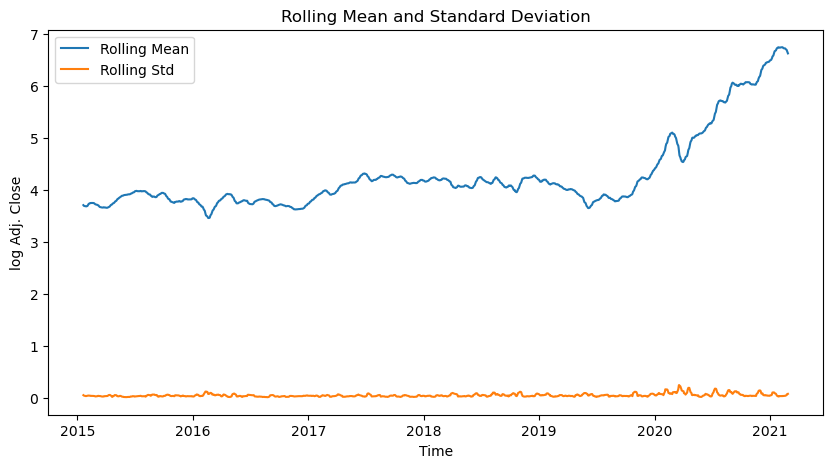

In [22]:
TSLA['log Adj. Close'] = np.log(TSLA['Adj. Close'])
TSLA_log_moving_avg = TSLA['log Adj. Close'].rolling(12).mean()
TSLA_log_std = TSLA['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(TSLA['Date'], TSLA_log_moving_avg, label = "Rolling Mean")
plt.plot(TSLA['Date'], TSLA_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

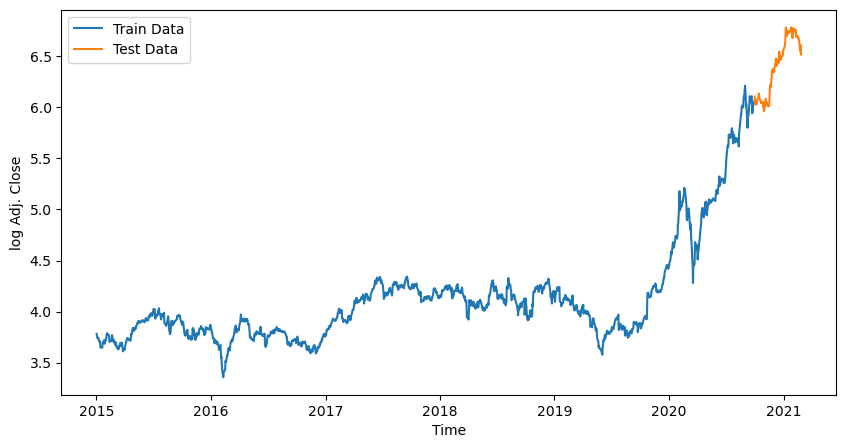

In [23]:
TSLA_Train_Data = TSLA[TSLA['Date'] < '2020-10-01']
TSLA_Test_Data = TSLA[TSLA['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

###Modeling

In [24]:
TSLA_Auto_ARIMA_Model = auto_arima(TSLA_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(TSLA_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(5, 2, 1)   Log Likelihood                2801.693
Date:                Thu, 18 Apr 2024   AIC                          -5587.385
Time:                        18:14:11   BIC                          -5545.178
Sample:                             0   HQIC                         -5571.632
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.046e-06   2.51e-05      0.121      0.904   -4.62e-05    5.23e-05
ar.L1          0.0337      0.020      1.676      0.094      -0.006       0.073
ar.L2         -0.0165      0.019     -0.847      0.3

In [25]:
TSLA_ARIMA_Model = ARIMA(TSLA_Train_Data['log Adj. Close'], order = (5, 2, 2))
TSLA_ARIMA_Model_Fit = TSLA_ARIMA_Model.fit()
print(TSLA_ARIMA_Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1447
Model:                 ARIMA(5, 2, 2)   Log Likelihood                2810.958
Date:                Thu, 18 Apr 2024   AIC                          -5605.917
Time:                        18:14:13   BIC                          -5563.710
Sample:                             0   HQIC                         -5590.164
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8534      0.550     -1.550      0.121      -1.932       0.225
ar.L2          0.0478      0.022      2.178      0.029       0.005       0.091
ar.L3          0.0729      0.031      2.389      0.0

###Predicting the closing stock price of Tesla

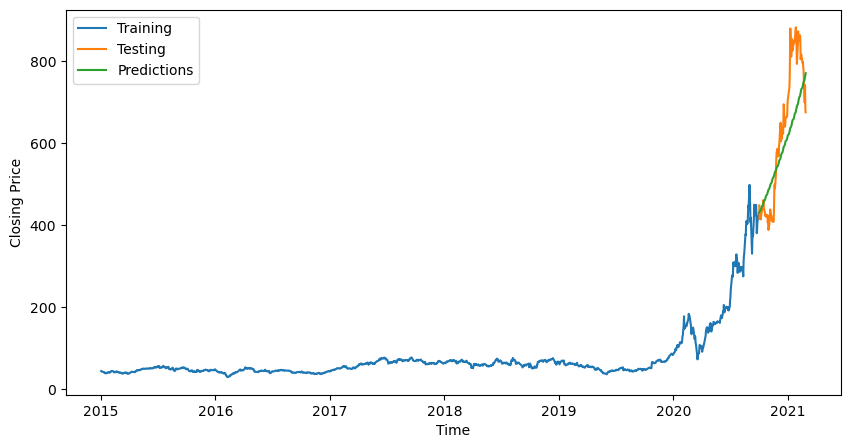

In [27]:
# Convert the forecasted values to numpy array and then to their exponent to reverse the log transformation
TSLA_predictions = np.exp(TSLA_output.to_numpy())

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['Adj. Close'], label='Training')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['Adj. Close'], label='Testing')
plt.plot(TSLA_Test_Data['Date'], TSLA_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [28]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Data['Adj. Close'], TSLA_predictions))
mape = np.mean(np.abs(TSLA_predictions - TSLA_Test_Data['Adj. Close'])/np.abs(TSLA_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 99.55614564618848
MAPE: 0.12388188171495695


#Google

In [29]:
GOOG.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  527.56  529.82  522.67  523.37      523.37  1447563.0
1  2015-01-05  521.83  522.89  511.66  512.46      512.46  2059840.0
2  2015-01-06  513.59  514.76  499.68  500.59      500.59  2899940.0
3  2015-01-07  505.61  505.86  498.28  499.73      499.73  2065054.0
4  2015-01-08  496.63  502.10  489.66  501.30      501.30  3353582.0

In [30]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [31]:
# Change Dtype of Date column
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

In [32]:
Test_Stationarity(GOOG)

Results of Dickey Fuller Test
Test Statistics: 0.6722962942047409
p-value: 0.9892684650395426
Number of lags used: 22
Number of observations used: 1526
critical value (1%): -3.4346424863111396
critical value (5%): -2.8634358661653803
critical value (10%): -2.5677793320839823


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

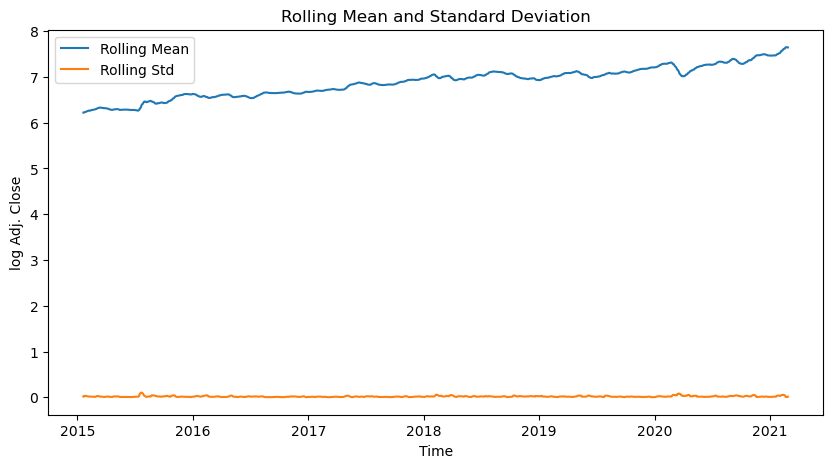

In [33]:
GOOG['log Adj. Close'] = np.log(GOOG['Adj. Close'])
GOOG_log_moving_avg = GOOG['log Adj. Close'].rolling(12).mean()
GOOG_log_std = GOOG['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(GOOG['Date'], GOOG_log_moving_avg, label = "Rolling Mean")
plt.plot(GOOG['Date'], GOOG_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

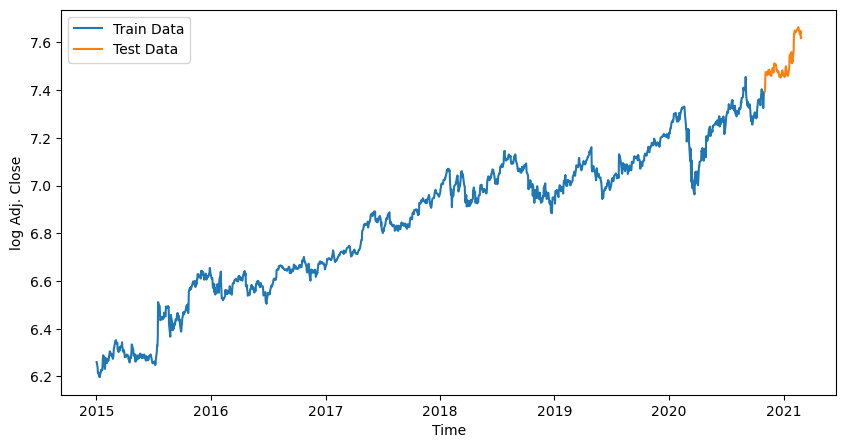

In [34]:
GOOG_Train_Data = GOOG[GOOG['Date'] < '2020-11-01']
GOOG_Test_Data = GOOG[GOOG['Date'] >= '2020-11-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(GOOG_Train_Data['Date'], GOOG_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(GOOG_Test_Data['Date'], GOOG_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

###Modeling

In [35]:
GOOG_Auto_ARIMA_Model = auto_arima(GOOG_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(GOOG_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1469
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3905.939
Date:                Thu, 18 Apr 2024   AIC                          -7805.878
Time:                        18:25:16   BIC                          -7790.003
Sample:                             0   HQIC                         -7799.958
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      1.882      0.060   -3.47e-05       0.002
ar.L1         -0.0876      0.015     -5.798      0.000      -0.117      -0.058
sigma2         0.0003   4.48e-06     63.886      0.0

In [36]:
GOOG_ARIMA_Model = ARIMA(GOOG_Train_Data['log Adj. Close'], order = (1, 1, 0))
GOOG_ARIMA_Model_Fit = GOOG_ARIMA_Model.fit()
print(GOOG_ARIMA_Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1469
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3904.148
Date:                Thu, 18 Apr 2024   AIC                          -7804.296
Time:                        18:25:16   BIC                          -7793.712
Sample:                             0   HQIC                         -7800.349
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0854      0.015     -5.640      0.000      -0.115      -0.056
sigma2         0.0003   4.48e-06     63.960      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

### Predicting the closing stock price of Google

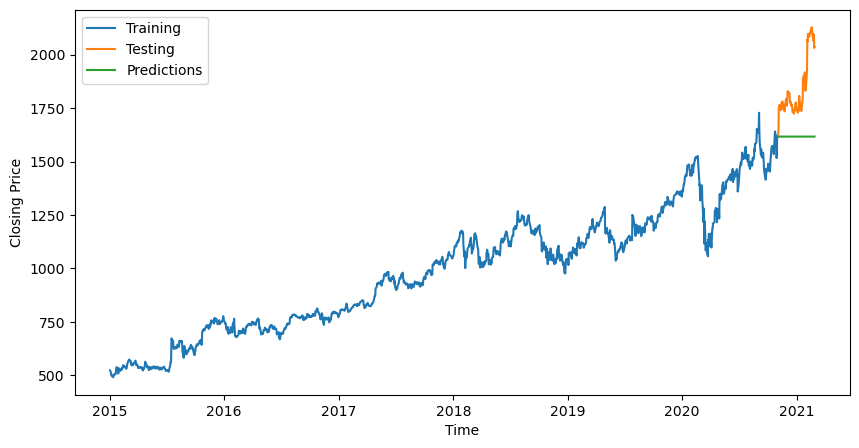

In [38]:
GOOG_predictions = np.exp(GOOG_output.to_numpy())

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(GOOG_Train_Data['Date'], GOOG_Train_Data['Adj. Close'], label='Training')
plt.plot(GOOG_Test_Data['Date'], GOOG_Test_Data['Adj. Close'], label='Testing')
plt.plot(GOOG_Test_Data['Date'], GOOG_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [39]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Data['Adj. Close'], GOOG_predictions))
mape = np.mean(np.abs(GOOG_predictions - GOOG_Test_Data['Adj. Close'])/np.abs(GOOG_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 265.8827661905101
MAPE: 0.11935077438431359


#Microsoft

In [40]:
MSFT.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  46.66  47.42  46.54  46.76       41.44  27913900.0
1  2015-01-05  46.37  46.73  46.25  46.33       41.06  39673900.0
2  2015-01-06  46.38  46.75  45.54  45.65       40.46  36447900.0
3  2015-01-07  45.98  46.46  45.49  46.23       40.97  29114100.0
4  2015-01-08  46.75  47.75  46.72  47.59       42.18  29645200.0

In [41]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [42]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

In [43]:
Test_Stationarity(MSFT)

Results of Dickey Fuller Test
Test Statistics: 2.1271168914605805
p-value: 0.9988169756931882
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

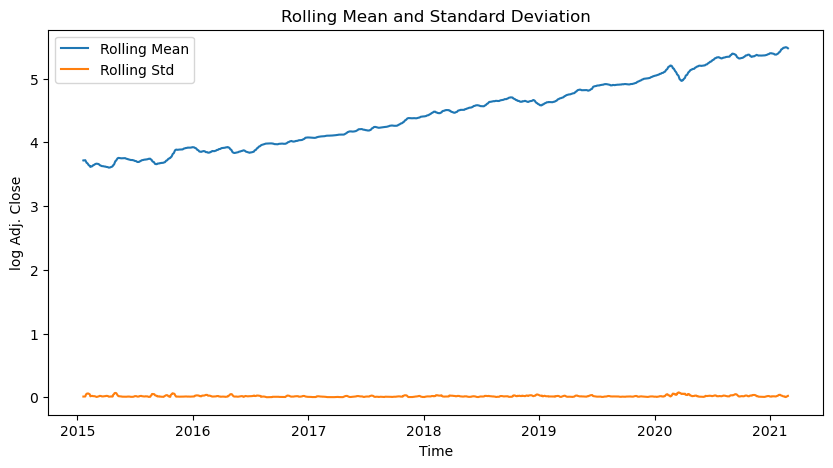

In [44]:
MSFT['log Adj. Close'] = np.log(MSFT['Adj. Close'])
MSFT_log_moving_avg = MSFT['log Adj. Close'].rolling(12).mean()
MSFT_log_std = MSFT['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(MSFT['Date'], MSFT_log_moving_avg, label = "Rolling Mean")
plt.plot(MSFT['Date'], MSFT_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

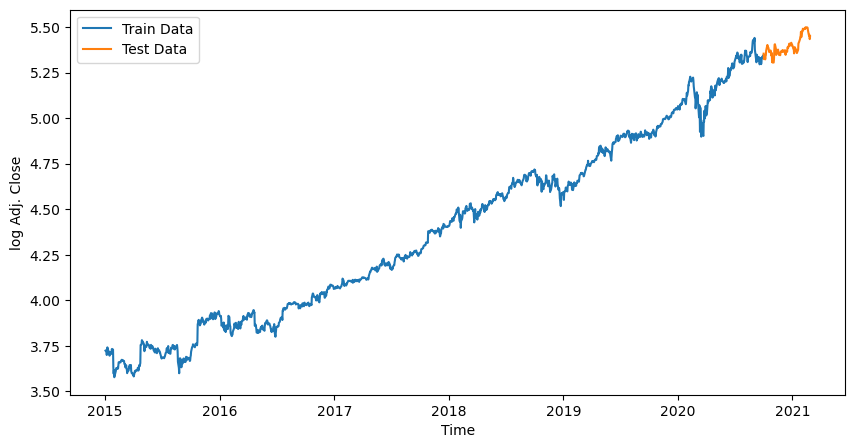

In [45]:
MSFT_Train_Data = MSFT[MSFT['Date'] < '2020-10-01']
MSFT_Test_Data = MSFT[MSFT['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(MSFT_Train_Data['Date'], MSFT_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(MSFT_Test_Data['Date'], MSFT_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

###Modeling

In [46]:
MSFT_Auto_ARIMA_Model = auto_arima(MSFT_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(MSFT_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3828.056
Date:                Thu, 18 Apr 2024   AIC                          -7650.112
Time:                        18:31:29   BIC                          -7634.282
Sample:                             0   HQIC                         -7644.204
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      2.995      0.003       0.000       0.002
ar.L1         -0.2169      0.012    -18.786      0.000      -0.239      -0.194
sigma2         0.0003   5.01e-06     58.650      0.0

In [47]:
MSFT_ARIMA_Model = ARIMA(MSFT_Train_Data['log Adj. Close'], order = (1, 1, 0))
MSFT_ARIMA_Model_Fit = MSFT_ARIMA_Model.fit()
print(MSFT_ARIMA_Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1447
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3823.523
Date:                Thu, 18 Apr 2024   AIC                          -7643.046
Time:                        18:31:30   BIC                          -7632.493
Sample:                             0   HQIC                         -7639.107
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2120      0.012    -18.278      0.000      -0.235      -0.189
sigma2         0.0003   5.06e-06     58.372      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.07   Jarque-

###Predicting the closing stock price of Microsoft

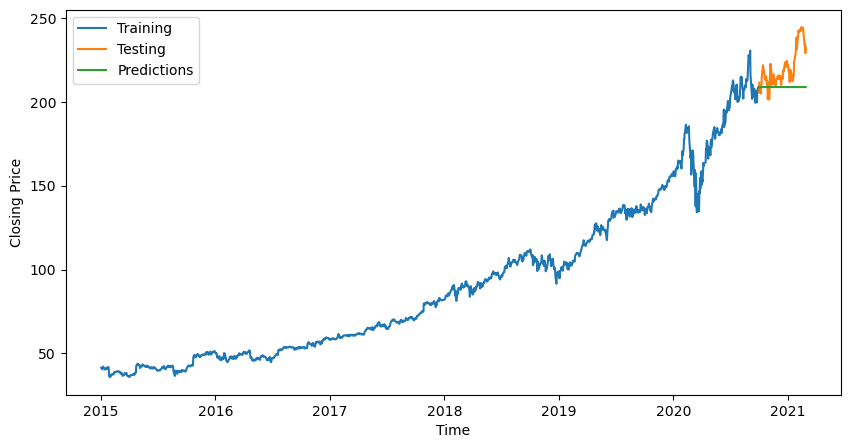

In [49]:
MSFT_predictions = np.exp(MSFT_output.to_numpy())

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(MSFT_Train_Data['Date'], MSFT_Train_Data['Adj. Close'], label='Training')
plt.plot(MSFT_Test_Data['Date'], MSFT_Test_Data['Adj. Close'], label='Testing')
plt.plot(MSFT_Test_Data['Date'], MSFT_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [50]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Data['Adj. Close'], MSFT_predictions))
mape = np.mean(np.abs(MSFT_predictions - MSFT_Test_Data['Adj. Close'])/np.abs(MSFT_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 16.195215290944535
MAPE: 0.053739774888686004


#Amazon

In [51]:
AMZN.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  312.58  314.75  306.96  308.52      308.52  2783200.0
1  2015-01-05  307.01  308.38  300.85  302.19      302.19  2774200.0
2  2015-01-06  302.24  303.00  292.38  295.29      295.29  3519000.0
3  2015-01-07  297.50  301.28  295.33  298.42      298.42  2640300.0
4  2015-01-08  300.32  303.14  296.11  300.46      300.46  3088400.0

In [52]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [53]:
# Change Dtype of Date column
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

In [54]:
Test_Stationarity(AMZN)

Results of Dickey Fuller Test
Test Statistics: 0.2703409634404947
p-value: 0.9759420712303005
Number of lags used: 18
Number of observations used: 1530
critical value (1%): -3.434631245212095
critical value (5%): -2.8634309048528066
critical value (10%): -2.5677766901619035


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

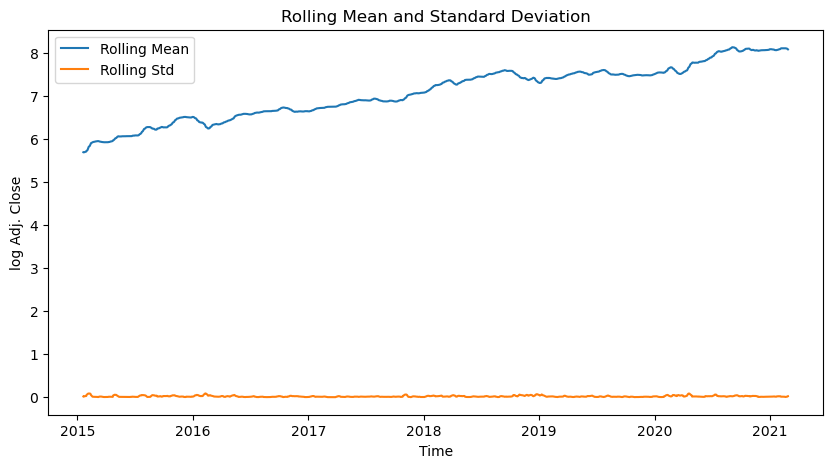

In [55]:
AMZN['log Adj. Close'] = np.log(AMZN['Adj. Close'])
AMZN_log_moving_avg = AMZN['log Adj. Close'].rolling(12).mean()
AMZN_log_std = AMZN['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(AMZN['Date'], AMZN_log_moving_avg, label = "Rolling Mean")
plt.plot(AMZN['Date'], AMZN_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

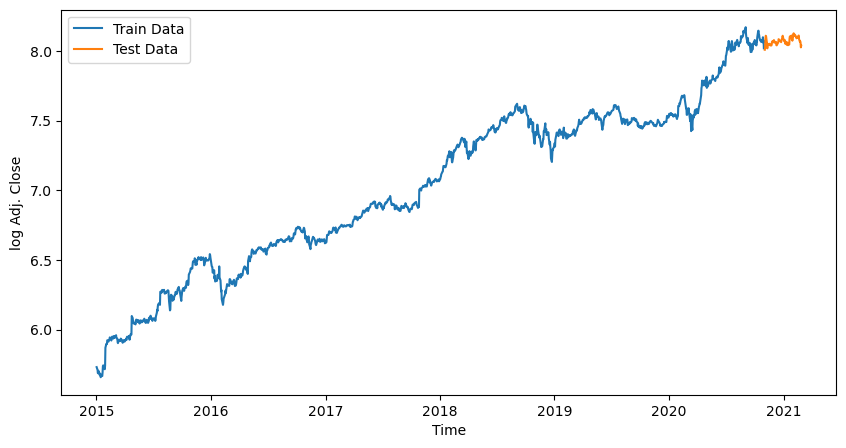

In [56]:
AMZN_Train_Data = AMZN[AMZN['Date'] < '2020-11-01']
AMZN_Test_Data = AMZN[AMZN['Date'] >= '2020-11-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(AMZN_Train_Data['Date'], AMZN_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(AMZN_Test_Data['Date'], AMZN_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

###Modeling

In [57]:
AMZN_Auto_ARIMA_Model = auto_arima(AMZN_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(AMZN_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1469
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3704.612
Date:                Thu, 18 Apr 2024   AIC                          -7405.225
Time:                        18:32:49   BIC                          -7394.641
Sample:                             0   HQIC                         -7401.278
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      3.025      0.002       0.001       0.003
sigma2         0.0004   6.92e-06     54.419      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.40   Jarque-

In [58]:
AMZN_ARIMA_Model = ARIMA(AMZN_Train_Data['log Adj. Close'], order = (0, 1, 0))
AMZN_ARIMA_Model_Fit = AMZN_ARIMA_Model.fit()
print(AMZN_ARIMA_Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1469
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3699.895
Date:                Thu, 18 Apr 2024   AIC                          -7397.791
Time:                        18:32:49   BIC                          -7392.499
Sample:                             0   HQIC                         -7395.817
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004    6.8e-06     55.650      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):              2529.69
Prob(Q):                              0.24   Pr

###Predicting the closing stock price of Amazon

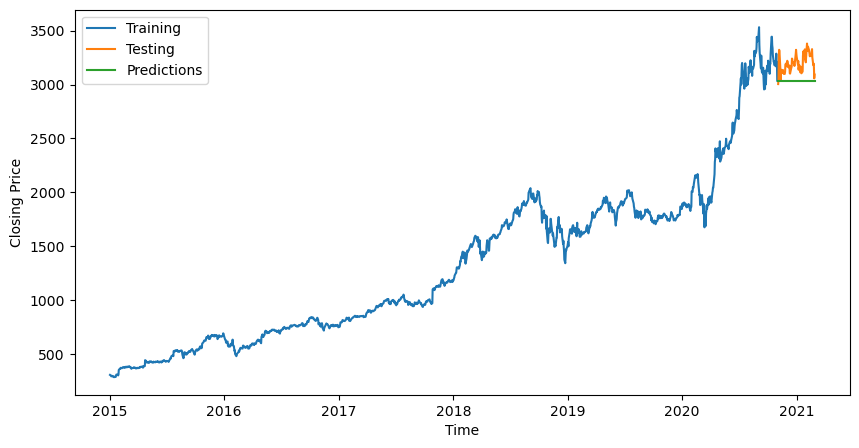

In [60]:
AMZN_predictions = np.exp(AMZN_output.to_numpy())

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(AMZN_Train_Data['Date'], AMZN_Train_Data['Adj. Close'], label='Training')
plt.plot(AMZN_Test_Data['Date'], AMZN_Test_Data['Adj. Close'], label='Testing')
plt.plot(AMZN_Test_Data['Date'], AMZN_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [61]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Data['Adj. Close'], AMZN_predictions))
mape = np.mean(np.abs(AMZN_predictions - AMZN_Test_Data['Adj. Close'])/np.abs(AMZN_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 184.39516145360327
MAPE: 0.05081794843184503


## Deep_Learning_Model

<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
AAPL = pd.read_csv("Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("Database/Pre_Processed_AMZN.csv")

### Data Proprocessing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [5]:
model = Model()

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 200)              │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

### Custom Learning Rate

In [8]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

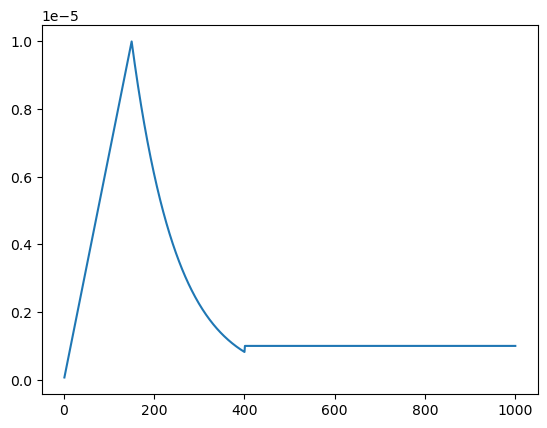

In [9]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [11]:
AAPL.head()

Date   Open   High    Low  Close  Adj. Close       Volume
0  2015-01-02  27.85  27.86  26.84  27.33       24.86  212818400.0
1  2015-01-05  27.07  27.16  26.35  26.56       24.16  257142000.0
2  2015-01-06  26.64  26.86  26.16  26.57       24.16  263188400.0
3  2015-01-07  26.80  27.05  26.67  26.94       24.50  160423600.0
4  2015-01-08  27.31  28.04  27.17  27.97       25.44  237458000.0

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [13]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

### Model Fitting

In [15]:
AAPL_Model = Model()

In [17]:
from tensorflow.keras.metrics import RootMeanSquaredError

AAPL_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [18]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2301.1472 - root_mean_squared_error: 47.9655 - val_loss: 15551.4248 - val_root_mean_squared_error: 124.7054 - learning_rate: 0.0000e+00
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2537.2615 - root_mean_squared_error: 50.3167 - val_loss: 15551.1201 - val_root_mean_squared_error: 124.7041 - learning_rate: 6.6667e-08
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2305.4478 - root_mean_squared_error: 48.0101 - val_loss: 15550.5332 - val_root_mean_squared_error: 124.7018 - learning_rate: 1.3333e-07
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2307.9258 - root_mean_squared_error: 48.0332 - val_loss: 15549.6152 - val_root_mean_squared_error: 124.6981 - learning_rate: 2.0000e-07
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2426.9941 - root_mean_squared_error: 49.2383 - val_loss: 15548.3828 - val_root_mean_squared_error: 124.6932 - learning_rate: 2.6667e-07
Epoch 6/1000
9/9 ━━━━━━━━

Epoch 37/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2363.1929 - root_mean_squared_error: 48.5538 - val_loss: 15312.8652 - val_root_mean_squared_error: 123.7452 - learning_rate: 2.4000e-06
Epoch 38/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2302.2905 - root_mean_squared_error: 47.9309 - val_loss: 15295.2451 - val_root_mean_squared_error: 123.6740 - learning_rate: 2.4667e-06
Epoch 39/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2401.8269 - root_mean_squared_error: 48.9779 - val_loss: 15275.7783 - val_root_mean_squared_error: 123.5952 - learning_rate: 2.5333e-06
Epoch 40/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2375.6724 - root_mean_squared_error: 48.7178 - val_loss: 15255.6689 - val_root_mean_squared_error: 123.5138 - learning_rate: 2.6000e-06
Epoch 41/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2323.0269 - root_mean_squared_error: 48.1789 - val_loss: 15234.4092 - val_root_mean_squared_error: 123.4277 - learning_rate: 2.6667e-06
Epoch 42/1000
9/9 ━━

Epoch 73/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1712.3749 - root_mean_squared_error: 41.3714 - val_loss: 11252.2461 - val_root_mean_squared_error: 106.0766 - learning_rate: 4.8000e-06
Epoch 74/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1690.3914 - root_mean_squared_error: 41.0845 - val_loss: 10959.0547 - val_root_mean_squared_error: 104.6855 - learning_rate: 4.8667e-06
Epoch 75/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1745.0056 - root_mean_squared_error: 41.7624 - val_loss: 10653.9375 - val_root_mean_squared_error: 103.2179 - learning_rate: 4.9333e-06
Epoch 76/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1617.8743 - root_mean_squared_error: 40.2078 - val_loss: 10348.1279 - val_root_mean_squared_error: 101.7257 - learning_rate: 5.0000e-06
Epoch 77/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1658.1748 - root_mean_squared_error: 40.7136 - val_loss: 10021.3047 - val_root_mean_squared_error: 100.1065 - learning_rate: 5.0667e-06
Epoch 78/1000
9/9 ━━

Epoch 109/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 912.7042 - root_mean_squared_error: 30.2063 - val_loss: 5155.3374 - val_root_mean_squared_error: 71.8007 - learning_rate: 7.2000e-06
Epoch 110/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 780.6544 - root_mean_squared_error: 27.9345 - val_loss: 4688.4829 - val_root_mean_squared_error: 68.4725 - learning_rate: 7.2667e-06
Epoch 111/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 715.6109 - root_mean_squared_error: 26.7356 - val_loss: 4314.3765 - val_root_mean_squared_error: 65.6839 - learning_rate: 7.3333e-06
Epoch 112/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 705.4141 - root_mean_squared_error: 26.5474 - val_loss: 4005.8665 - val_root_mean_squared_error: 63.2919 - learning_rate: 7.4000e-06
Epoch 113/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 648.9316 - root_mean_squared_error: 25.4701 - val_loss: 3774.8474 - val_root_mean_squared_error: 61.4398 - learning_rate: 7.4667e-06
Epoch 114/1000
9/9 ━━━━━━━━━━━

Epoch 182/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8594 - root_mean_squared_error: 2.7992 - val_loss: 28.1869 - val_root_mean_squared_error: 5.3091 - learning_rate: 7.3345e-06
Epoch 183/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6972 - root_mean_squared_error: 2.5822 - val_loss: 28.0749 - val_root_mean_squared_error: 5.2986 - learning_rate: 7.2615e-06
Epoch 184/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0363 - root_mean_squared_error: 2.4439 - val_loss: 27.8974 - val_root_mean_squared_error: 5.2818 - learning_rate: 7.1892e-06
Epoch 185/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9611 - root_mean_squared_error: 2.8142 - val_loss: 28.0706 - val_root_mean_squared_error: 5.2982 - learning_rate: 7.1177e-06
Epoch 186/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3949 - root_mean_squared_error: 2.5148 - val_loss: 27.7924 - val_root_mean_squared_error: 5.2718 - learning_rate: 7.0469e-06
Epoch 187/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 219/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9619 - root_mean_squared_error: 2.4393 - val_loss: 27.2465 - val_root_mean_squared_error: 5.2198 - learning_rate: 5.0662e-06
Epoch 220/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4931 - root_mean_squared_error: 2.3318 - val_loss: 27.1704 - val_root_mean_squared_error: 5.2125 - learning_rate: 5.0158e-06
Epoch 221/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9831 - root_mean_squared_error: 2.4423 - val_loss: 26.9969 - val_root_mean_squared_error: 5.1958 - learning_rate: 4.9659e-06
Epoch 222/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7701 - root_mean_squared_error: 2.3976 - val_loss: 26.5795 - val_root_mean_squared_error: 5.1555 - learning_rate: 4.9164e-06
Epoch 223/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2052 - root_mean_squared_error: 2.4842 - val_loss: 26.3568 - val_root_mean_squared_error: 5.1339 - learning_rate: 4.8675e-06
Epoch 224/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 256/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0883 - root_mean_squared_error: 2.4548 - val_loss: 26.7066 - val_root_mean_squared_error: 5.1678 - learning_rate: 3.4994e-06
Epoch 257/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1044 - root_mean_squared_error: 2.4552 - val_loss: 26.4981 - val_root_mean_squared_error: 5.1476 - learning_rate: 3.4646e-06
Epoch 258/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7600 - root_mean_squared_error: 2.1569 - val_loss: 26.9387 - val_root_mean_squared_error: 5.1903 - learning_rate: 3.4301e-06
Epoch 259/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8562 - root_mean_squared_error: 2.7656 - val_loss: 26.3613 - val_root_mean_squared_error: 5.1343 - learning_rate: 3.3960e-06
Epoch 260/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3254 - root_mean_squared_error: 2.6934 - val_loss: 26.5103 - val_root_mean_squared_error: 5.1488 - learning_rate: 3.3622e-06
Epoch 261/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 293/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4831 - root_mean_squared_error: 2.3340 - val_loss: 26.5798 - val_root_mean_squared_error: 5.1556 - learning_rate: 2.4171e-06
Epoch 294/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7180 - root_mean_squared_error: 2.1622 - val_loss: 26.3769 - val_root_mean_squared_error: 5.1358 - learning_rate: 2.3931e-06
Epoch 295/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4260 - root_mean_squared_error: 2.7088 - val_loss: 26.3926 - val_root_mean_squared_error: 5.1374 - learning_rate: 2.3693e-06
Epoch 296/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8215 - root_mean_squared_error: 2.4100 - val_loss: 26.3747 - val_root_mean_squared_error: 5.1356 - learning_rate: 2.3457e-06
Epoch 297/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2852 - root_mean_squared_error: 2.2900 - val_loss: 26.4730 - val_root_mean_squared_error: 5.1452 - learning_rate: 2.3224e-06
Epoch 298/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

Epoch 330/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6527 - root_mean_squared_error: 2.3727 - val_loss: 26.0876 - val_root_mean_squared_error: 5.1076 - learning_rate: 1.6696e-06
Epoch 331/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8971 - root_mean_squared_error: 2.4213 - val_loss: 26.2135 - val_root_mean_squared_error: 5.1199 - learning_rate: 1.6530e-06
Epoch 332/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2208 - root_mean_squared_error: 2.2809 - val_loss: 26.2482 - val_root_mean_squared_error: 5.1233 - learning_rate: 1.6365e-06
Epoch 333/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7238 - root_mean_squared_error: 2.1594 - val_loss: 26.1712 - val_root_mean_squared_error: 5.1158 - learning_rate: 1.6203e-06
Epoch 334/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4537 - root_mean_squared_error: 2.5372 - val_loss: 26.0741 - val_root_mean_squared_error: 5.1063 - learning_rate: 1.6041e-06
Epoch 335/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 367/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8051 - root_mean_squared_error: 2.3935 - val_loss: 25.9656 - val_root_mean_squared_error: 5.0956 - learning_rate: 1.1533e-06
Epoch 368/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2546 - root_mean_squared_error: 2.2902 - val_loss: 26.0748 - val_root_mean_squared_error: 5.1064 - learning_rate: 1.1418e-06
Epoch 369/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.4090 - root_mean_squared_error: 2.5246 - val_loss: 25.9585 - val_root_mean_squared_error: 5.0949 - learning_rate: 1.1304e-06
Epoch 370/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2211 - root_mean_squared_error: 2.2596 - val_loss: 25.9756 - val_root_mean_squared_error: 5.0966 - learning_rate: 1.1192e-06
Epoch 371/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3454 - root_mean_squared_error: 2.3081 - val_loss: 25.9868 - val_root_mean_squared_error: 5.0977 - learning_rate: 1.1080e-06
Epoch 372/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 404/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.2112 - root_mean_squared_error: 2.2796 - val_loss: 25.9294 - val_root_mean_squared_error: 5.0921 - learning_rate: 1.0000e-06
Epoch 405/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6633 - root_mean_squared_error: 2.3734 - val_loss: 25.8645 - val_root_mean_squared_error: 5.0857 - learning_rate: 1.0000e-06
Epoch 406/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4003 - root_mean_squared_error: 2.0848 - val_loss: 25.9340 - val_root_mean_squared_error: 5.0925 - learning_rate: 1.0000e-06
Epoch 407/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6916 - root_mean_squared_error: 2.3803 - val_loss: 25.8221 - val_root_mean_squared_error: 5.0815 - learning_rate: 1.0000e-06
Epoch 408/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4248 - root_mean_squared_error: 2.3248 - val_loss: 25.8307 - val_root_mean_squared_error: 5.0824 - learning_rate: 1.0000e-06
Epoch 409/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 441/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6758 - root_mean_squared_error: 2.3777 - val_loss: 25.7233 - val_root_mean_squared_error: 5.0718 - learning_rate: 1.0000e-06
Epoch 442/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7949 - root_mean_squared_error: 2.4048 - val_loss: 25.7336 - val_root_mean_squared_error: 5.0728 - learning_rate: 1.0000e-06
Epoch 443/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2570 - root_mean_squared_error: 2.4850 - val_loss: 25.7240 - val_root_mean_squared_error: 5.0719 - learning_rate: 1.0000e-06
Epoch 444/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3749 - root_mean_squared_error: 2.0825 - val_loss: 25.8067 - val_root_mean_squared_error: 5.0800 - learning_rate: 1.0000e-06
Epoch 445/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2304 - root_mean_squared_error: 2.4785 - val_loss: 25.7727 - val_root_mean_squared_error: 5.0767 - learning_rate: 1.0000e-06
Epoch 446/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 478/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5627 - root_mean_squared_error: 2.1278 - val_loss: 25.6885 - val_root_mean_squared_error: 5.0684 - learning_rate: 1.0000e-06
Epoch 479/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2047 - root_mean_squared_error: 2.2700 - val_loss: 25.6059 - val_root_mean_squared_error: 5.0602 - learning_rate: 1.0000e-06
Epoch 480/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2511 - root_mean_squared_error: 2.2829 - val_loss: 25.5976 - val_root_mean_squared_error: 5.0594 - learning_rate: 1.0000e-06
Epoch 481/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1653 - root_mean_squared_error: 2.2639 - val_loss: 25.6034 - val_root_mean_squared_error: 5.0600 - learning_rate: 1.0000e-06
Epoch 482/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1038 - root_mean_squared_error: 2.2559 - val_loss: 25.7045 - val_root_mean_squared_error: 5.0700 - learning_rate: 1.0000e-06
Epoch 483/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 515/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2755 - root_mean_squared_error: 2.5006 - val_loss: 25.6680 - val_root_mean_squared_error: 5.0664 - learning_rate: 1.0000e-06
Epoch 516/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0566 - root_mean_squared_error: 2.4508 - val_loss: 25.6114 - val_root_mean_squared_error: 5.0608 - learning_rate: 1.0000e-06
Epoch 517/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1658 - root_mean_squared_error: 2.2713 - val_loss: 25.6787 - val_root_mean_squared_error: 5.0674 - learning_rate: 1.0000e-06
Epoch 518/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6943 - root_mean_squared_error: 2.5545 - val_loss: 25.5734 - val_root_mean_squared_error: 5.0570 - learning_rate: 1.0000e-06
Epoch 519/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9225 - root_mean_squared_error: 1.9530 - val_loss: 25.6379 - val_root_mean_squared_error: 5.0634 - learning_rate: 1.0000e-06
Epoch 520/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 552/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9399 - root_mean_squared_error: 2.2202 - val_loss: 25.6813 - val_root_mean_squared_error: 5.0677 - learning_rate: 1.0000e-06
Epoch 553/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.9058 - root_mean_squared_error: 2.2116 - val_loss: 25.6147 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 554/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0367 - root_mean_squared_error: 2.2426 - val_loss: 25.6105 - val_root_mean_squared_error: 5.0607 - learning_rate: 1.0000e-06
Epoch 555/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8647 - root_mean_squared_error: 2.1928 - val_loss: 25.5879 - val_root_mean_squared_error: 5.0585 - learning_rate: 1.0000e-06
Epoch 556/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8783 - root_mean_squared_error: 2.2073 - val_loss: 25.6148 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 557/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 589/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3658 - root_mean_squared_error: 2.0812 - val_loss: 25.6668 - val_root_mean_squared_error: 5.0662 - learning_rate: 1.0000e-06
Epoch 590/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5337 - root_mean_squared_error: 2.5392 - val_loss: 25.6285 - val_root_mean_squared_error: 5.0625 - learning_rate: 1.0000e-06
Epoch 591/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8153 - root_mean_squared_error: 2.1897 - val_loss: 25.6165 - val_root_mean_squared_error: 5.0613 - learning_rate: 1.0000e-06
Epoch 592/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.0521 - root_mean_squared_error: 2.2413 - val_loss: 25.7099 - val_root_mean_squared_error: 5.0705 - learning_rate: 1.0000e-06
Epoch 593/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9601 - root_mean_squared_error: 2.4358 - val_loss: 25.6482 - val_root_mean_squared_error: 5.0644 - learning_rate: 1.0000e-06
Epoch 594/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 626/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2555 - root_mean_squared_error: 2.4741 - val_loss: 25.6448 - val_root_mean_squared_error: 5.0641 - learning_rate: 1.0000e-06
Epoch 627/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0587 - root_mean_squared_error: 2.2417 - val_loss: 25.6637 - val_root_mean_squared_error: 5.0659 - learning_rate: 1.0000e-06
Epoch 628/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.9917 - root_mean_squared_error: 2.2088 - val_loss: 25.6926 - val_root_mean_squared_error: 5.0688 - learning_rate: 1.0000e-06
Epoch 629/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6016 - root_mean_squared_error: 2.1379 - val_loss: 25.6850 - val_root_mean_squared_error: 5.0680 - learning_rate: 1.0000e-06
Epoch 630/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9943 - root_mean_squared_error: 1.9876 - val_loss: 25.6655 - val_root_mean_squared_error: 5.0661 - learning_rate: 1.0000e-06
Epoch 631/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 663/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1001 - root_mean_squared_error: 2.0143 - val_loss: 25.6499 - val_root_mean_squared_error: 5.0646 - learning_rate: 1.0000e-06
Epoch 664/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2472 - root_mean_squared_error: 2.0514 - val_loss: 25.6620 - val_root_mean_squared_error: 5.0658 - learning_rate: 1.0000e-06
Epoch 665/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.8704 - root_mean_squared_error: 2.4176 - val_loss: 25.6776 - val_root_mean_squared_error: 5.0673 - learning_rate: 1.0000e-06
Epoch 666/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9951 - root_mean_squared_error: 1.9736 - val_loss: 25.7287 - val_root_mean_squared_error: 5.0723 - learning_rate: 1.0000e-06
Epoch 667/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1673 - root_mean_squared_error: 2.0348 - val_loss: 25.6346 - val_root_mean_squared_error: 5.0631 - learning_rate: 1.0000e-06
Epoch 668/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 700/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0518 - root_mean_squared_error: 2.2386 - val_loss: 25.6985 - val_root_mean_squared_error: 5.0694 - learning_rate: 1.0000e-06
Epoch 701/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8782 - root_mean_squared_error: 2.2074 - val_loss: 25.6785 - val_root_mean_squared_error: 5.0674 - learning_rate: 1.0000e-06
Epoch 702/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7737 - root_mean_squared_error: 2.1783 - val_loss: 25.6874 - val_root_mean_squared_error: 5.0683 - learning_rate: 1.0000e-06
Epoch 703/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3588 - root_mean_squared_error: 2.3013 - val_loss: 25.6143 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 704/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2002 - root_mean_squared_error: 2.0444 - val_loss: 25.6443 - val_root_mean_squared_error: 5.0640 - learning_rate: 1.0000e-06
Epoch 705/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 737/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5128 - root_mean_squared_error: 2.1165 - val_loss: 25.6939 - val_root_mean_squared_error: 5.0689 - learning_rate: 1.0000e-06
Epoch 738/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6008 - root_mean_squared_error: 2.1431 - val_loss: 25.7038 - val_root_mean_squared_error: 5.0699 - learning_rate: 1.0000e-06
Epoch 739/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1022 - root_mean_squared_error: 2.2496 - val_loss: 25.6359 - val_root_mean_squared_error: 5.0632 - learning_rate: 1.0000e-06
Epoch 740/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3831 - root_mean_squared_error: 2.5039 - val_loss: 25.6276 - val_root_mean_squared_error: 5.0624 - learning_rate: 1.0000e-06
Epoch 741/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4303 - root_mean_squared_error: 2.0832 - val_loss: 25.6577 - val_root_mean_squared_error: 5.0653 - learning_rate: 1.0000e-06
Epoch 742/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 774/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6657 - root_mean_squared_error: 1.8968 - val_loss: 25.7384 - val_root_mean_squared_error: 5.0733 - learning_rate: 1.0000e-06
Epoch 775/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3320 - root_mean_squared_error: 2.3053 - val_loss: 25.7514 - val_root_mean_squared_error: 5.0746 - learning_rate: 1.0000e-06
Epoch 776/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5383 - root_mean_squared_error: 2.1275 - val_loss: 25.7646 - val_root_mean_squared_error: 5.0759 - learning_rate: 1.0000e-06
Epoch 777/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4009 - root_mean_squared_error: 2.0876 - val_loss: 25.7218 - val_root_mean_squared_error: 5.0717 - learning_rate: 1.0000e-06
Epoch 778/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.3609 - root_mean_squared_error: 2.0820 - val_loss: 25.7782 - val_root_mean_squared_error: 5.0772 - learning_rate: 1.0000e-06
Epoch 779/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 811/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7077 - root_mean_squared_error: 2.1624 - val_loss: 25.7232 - val_root_mean_squared_error: 5.0718 - learning_rate: 1.0000e-06
Epoch 812/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8873 - root_mean_squared_error: 2.2044 - val_loss: 25.7076 - val_root_mean_squared_error: 5.0703 - learning_rate: 1.0000e-06
Epoch 813/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7716 - root_mean_squared_error: 1.8926 - val_loss: 25.7870 - val_root_mean_squared_error: 5.0781 - learning_rate: 1.0000e-06
Epoch 814/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7236 - root_mean_squared_error: 2.1703 - val_loss: 25.7693 - val_root_mean_squared_error: 5.0763 - learning_rate: 1.0000e-06
Epoch 815/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4990 - root_mean_squared_error: 2.3352 - val_loss: 25.7346 - val_root_mean_squared_error: 5.0729 - learning_rate: 1.0000e-06
Epoch 816/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 848/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8468 - root_mean_squared_error: 2.1972 - val_loss: 25.7835 - val_root_mean_squared_error: 5.0777 - learning_rate: 1.0000e-06
Epoch 849/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7554 - root_mean_squared_error: 1.9308 - val_loss: 25.8922 - val_root_mean_squared_error: 5.0884 - learning_rate: 1.0000e-06
Epoch 850/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8240 - root_mean_squared_error: 2.1795 - val_loss: 25.8462 - val_root_mean_squared_error: 5.0839 - learning_rate: 1.0000e-06
Epoch 851/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0647 - root_mean_squared_error: 2.2468 - val_loss: 25.8956 - val_root_mean_squared_error: 5.0888 - learning_rate: 1.0000e-06
Epoch 852/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3509 - root_mean_squared_error: 2.3098 - val_loss: 25.8308 - val_root_mean_squared_error: 5.0824 - learning_rate: 1.0000e-06
Epoch 853/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 885/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1491 - root_mean_squared_error: 2.0356 - val_loss: 25.9130 - val_root_mean_squared_error: 5.0905 - learning_rate: 1.0000e-06
Epoch 886/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5408 - root_mean_squared_error: 2.1269 - val_loss: 25.8993 - val_root_mean_squared_error: 5.0891 - learning_rate: 1.0000e-06
Epoch 887/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7011 - root_mean_squared_error: 1.9190 - val_loss: 25.9286 - val_root_mean_squared_error: 5.0920 - learning_rate: 1.0000e-06
Epoch 888/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9300 - root_mean_squared_error: 2.2181 - val_loss: 25.9147 - val_root_mean_squared_error: 5.0907 - learning_rate: 1.0000e-06
Epoch 889/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7411 - root_mean_squared_error: 1.9203 - val_loss: 25.8881 - val_root_mean_squared_error: 5.0880 - learning_rate: 1.0000e-06
Epoch 890/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 922/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3093 - root_mean_squared_error: 2.0649 - val_loss: 26.0268 - val_root_mean_squared_error: 5.1017 - learning_rate: 1.0000e-06
Epoch 923/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0987 - root_mean_squared_error: 2.2492 - val_loss: 26.0087 - val_root_mean_squared_error: 5.0999 - learning_rate: 1.0000e-06
Epoch 924/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6953 - root_mean_squared_error: 2.1640 - val_loss: 25.9764 - val_root_mean_squared_error: 5.0967 - learning_rate: 1.0000e-06
Epoch 925/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8761 - root_mean_squared_error: 2.2011 - val_loss: 25.9532 - val_root_mean_squared_error: 5.0944 - learning_rate: 1.0000e-06
Epoch 926/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6541 - root_mean_squared_error: 2.1507 - val_loss: 25.9401 - val_root_mean_squared_error: 5.0931 - learning_rate: 1.0000e-06
Epoch 927/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

Epoch 959/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.2617 - root_mean_squared_error: 2.0600 - val_loss: 26.1239 - val_root_mean_squared_error: 5.1112 - learning_rate: 1.0000e-06
Epoch 960/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2947 - root_mean_squared_error: 2.2800 - val_loss: 26.0782 - val_root_mean_squared_error: 5.1067 - learning_rate: 1.0000e-06
Epoch 961/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4516 - root_mean_squared_error: 2.3201 - val_loss: 26.0606 - val_root_mean_squared_error: 5.1050 - learning_rate: 1.0000e-06
Epoch 962/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0446 - root_mean_squared_error: 1.9976 - val_loss: 26.0837 - val_root_mean_squared_error: 5.1072 - learning_rate: 1.0000e-06
Epoch 963/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0503 - root_mean_squared_error: 2.0099 - val_loss: 26.1574 - val_root_mean_squared_error: 5.1144 - learning_rate: 1.0000e-06
Epoch 964/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 996/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2737 - root_mean_squared_error: 2.2813 - val_loss: 26.2051 - val_root_mean_squared_error: 5.1191 - learning_rate: 1.0000e-06
Epoch 997/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0221 - root_mean_squared_error: 2.2255 - val_loss: 26.2677 - val_root_mean_squared_error: 5.1252 - learning_rate: 1.0000e-06
Epoch 998/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2056 - root_mean_squared_error: 2.0395 - val_loss: 26.2813 - val_root_mean_squared_error: 5.1265 - learning_rate: 1.0000e-06
Epoch 999/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0808 - root_mean_squared_error: 2.0119 - val_loss: 26.2798 - val_root_mean_squared_error: 5.1264 - learning_rate: 1.0000e-06
Epoch 1000/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9975 - root_mean_squared_error: 1.9865 - val_loss: 26.2885 - val_root_mean_squared_error: 5.1272 - learning_rate: 1.0000e-06


In [20]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

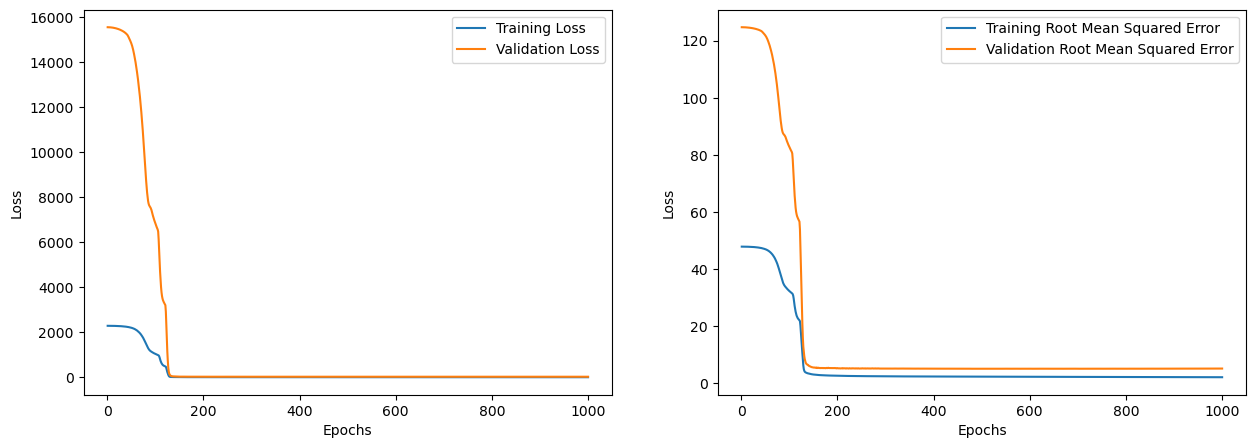

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [22]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


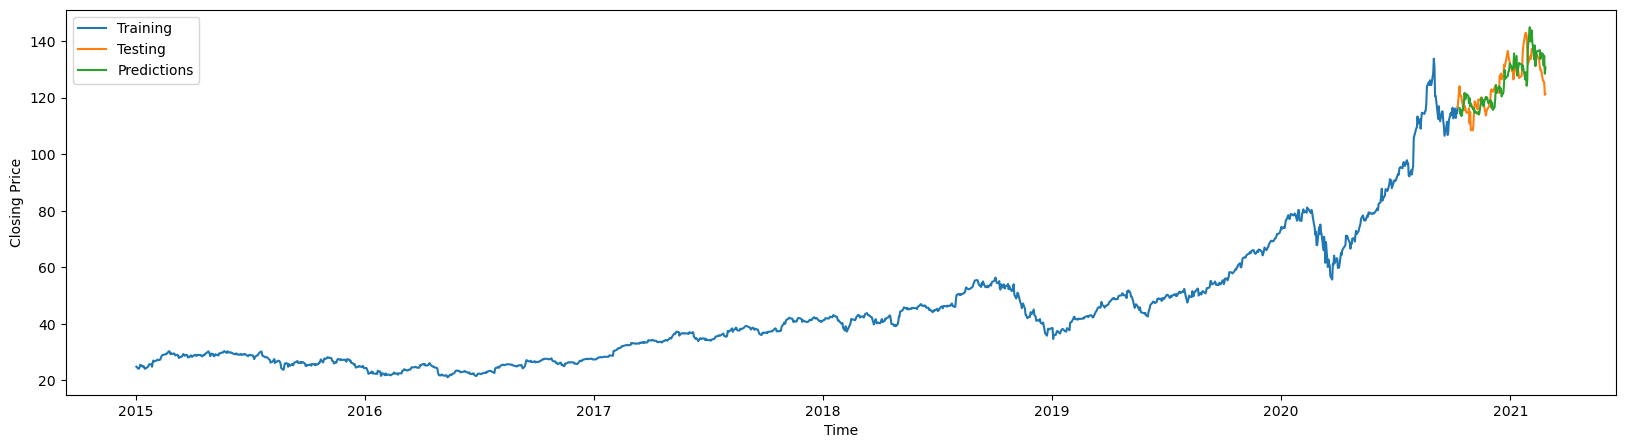

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [24]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.1272303269693715
MAPE: 0.031963326566601856


#Tesla

In [25]:
TSLA.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  44.57  44.65  42.65  43.86       43.86  23822000.0
1  2015-01-05  42.91  43.30  41.43  42.02       42.02  26842500.0
2  2015-01-06  42.01  42.84  40.84  42.26       42.26  31309500.0
3  2015-01-07  42.67  42.96  41.96  42.19       42.19  14842000.0
4  2015-01-08  42.56  42.76  42.00  42.12       42.12  17212500.0

In [26]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [27]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [28]:
TSLA_Date = '2020-10-01'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA, TSLA_Date)

### Model Fitting

In [29]:
TSLA_Model = Model()

In [33]:
from tensorflow.keras.metrics import RootMeanSquaredError

TSLA_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [34]:
TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9067.0166 - root_mean_squared_error: 94.8969 - val_loss: 425451.5938 - val_root_mean_squared_error: 652.2665 - learning_rate: 0.0000e+00
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11208.2764 - root_mean_squared_error: 105.4706 - val_loss: 425440.2500 - val_root_mean_squared_error: 652.2578 - learning_rate: 6.6667e-08
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9946.4492 - root_mean_squared_error: 99.5668 - val_loss: 425420.4062 - val_root_mean_squared_error: 652.2426 - learning_rate: 1.3333e-07
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9374.7441 - root_mean_squared_error: 96.5487 - val_loss: 425391.7188 - val_root_mean_squared_error: 652.2206 - learning_rate: 2.0000e-07
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10695.3682 - root_mean_squared_error: 103.2333 - val_loss: 425349.4062 - val_root_mean_squared_error: 652.1882 - learning_rate: 2.6667e-07
Epoch 6/200
9/9 ━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11344.8203 - root_mean_squared_error: 105.0961 - val_loss: 366090.8125 - val_root_mean_squared_error: 605.0544 - learning_rate: 4.6667e-06
Epoch 72/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7748.8076 - root_mean_squared_error: 87.1775 - val_loss: 359925.4688 - val_root_mean_squared_error: 599.9379 - learning_rate: 4.7333e-06
Epoch 73/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8016.9482 - root_mean_squared_error: 89.4048 - val_loss: 353842.7188 - val_root_mean_squared_error: 594.8468 - learning_rate: 4.8000e-06
Epoch 74/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8505.8457 - root_mean_squared_error: 92.1825 - val_loss: 347081.9062 - val_root_mean_squared_error: 589.1366 - learning_rate: 4.8667e-06
Epoch 75/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8967.6738 - root_mean_squared_error: 94.5667 - val_loss: 340091.3125 - val_root_mean_squared_error: 583.1735 - learning_rate: 4.9333e-06
Epoch 76/200
9/9 ━━━━━━━━━━━━━━

Epoch 107/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 318.4153 - root_mean_squared_error: 17.7388 - val_loss: 7753.8823 - val_root_mean_squared_error: 88.0561 - learning_rate: 7.0667e-06
Epoch 108/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220.4914 - root_mean_squared_error: 14.5559 - val_loss: 7019.8140 - val_root_mean_squared_error: 83.7843 - learning_rate: 7.1333e-06
Epoch 109/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.8876 - root_mean_squared_error: 13.4106 - val_loss: 6511.5015 - val_root_mean_squared_error: 80.6939 - learning_rate: 7.2000e-06
Epoch 110/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 226.4627 - root_mean_squared_error: 14.9646 - val_loss: 5392.8892 - val_root_mean_squared_error: 73.4363 - learning_rate: 7.2667e-06
Epoch 111/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 181.9640 - root_mean_squared_error: 13.2285 - val_loss: 5196.8691 - val_root_mean_squared_error: 72.0893 - learning_rate: 7.3333e-06
Epoch 112/200
9/9 ━━━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 75.3356 - root_mean_squared_error: 8.6508 - val_loss: 7601.2798 - val_root_mean_squared_error: 87.1853 - learning_rate: 7.5578e-06
Epoch 180/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82.6342 - root_mean_squared_error: 9.0722 - val_loss: 7581.5952 - val_root_mean_squared_error: 87.0724 - learning_rate: 7.4826e-06
Epoch 181/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.6317 - root_mean_squared_error: 8.1038 - val_loss: 7709.0073 - val_root_mean_squared_error: 87.8009 - learning_rate: 7.4082e-06
Epoch 182/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.8642 - root_mean_squared_error: 8.3698 - val_loss: 7546.0444 - val_root_mean_squared_error: 86.8680 - learning_rate: 7.3345e-06
Epoch 183/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.0309 - root_mean_squared_error: 8.8871 - val_loss: 7980.9360 - val_root_mean_squared_error: 89.3361 - learning_rate: 7.2615e-06
Epoch 184/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

In [35]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

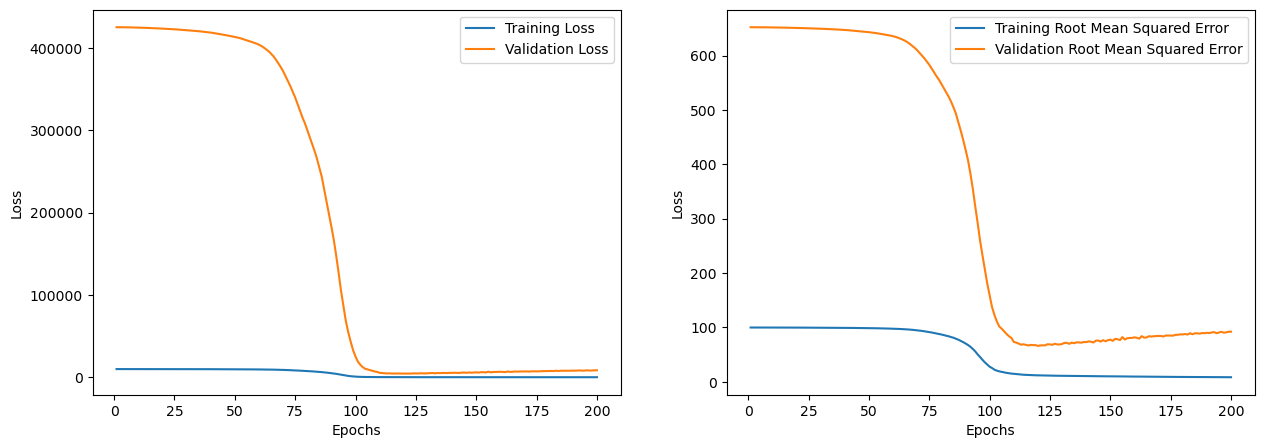

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Tesla

In [37]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


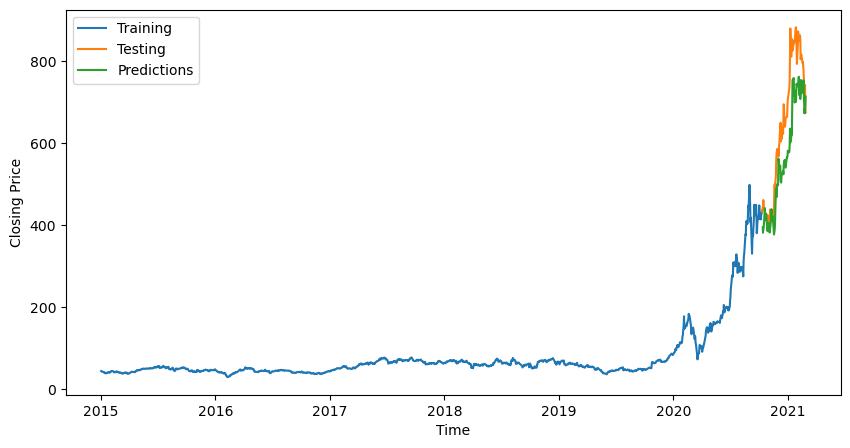

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'][TSLA['Date'] < '2020-10-12'], TSLA['Adj. Close'][TSLA['Date'] < '2020-10-12'], label = 'Training')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-09'], TSLA['Adj. Close'][TSLA['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-12'], TSLA_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [39]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 92.16061928957319
MAPE: 0.10828154582753205


#Google

In [40]:
GOOG.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  527.56  529.82  522.67  523.37      523.37  1447563.0
1  2015-01-05  521.83  522.89  511.66  512.46      512.46  2059840.0
2  2015-01-06  513.59  514.76  499.68  500.59      500.59  2899940.0
3  2015-01-07  505.61  505.86  498.28  499.73      499.73  2065054.0
4  2015-01-08  496.63  502.10  489.66  501.30      501.30  3353582.0

In [41]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [42]:
# Change Dtype of Date column
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [43]:
GOOG_Date = '2020-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

### Model Fitting

In [44]:
GOOG_Model = Model()

In [46]:
from tensorflow.keras.metrics import RootMeanSquaredError

GOOG_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [47]:
GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1063533.7500 - root_mean_squared_error: 1031.2339 - val_loss: 3416025.0000 - val_root_mean_squared_error: 1848.2491 - learning_rate: 0.0000e+00
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 969808.7500 - root_mean_squared_error: 984.2276 - val_loss: 3415884.7500 - val_root_mean_squared_error: 1848.2112 - learning_rate: 6.6667e-08
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1021232.1875 - root_mean_squared_error: 1010.4500 - val_loss: 3415600.0000 - val_root_mean_squared_error: 1848.1342 - learning_rate: 1.3333e-07
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1053402.6250 - root_mean_squared_error: 1026.2648 - val_loss: 3415181.2500 - val_root_mean_squared_error: 1848.0209 - learning_rate: 2.0000e-07
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 980478.5000 - root_mean_squared_error: 989.7791 - val_loss: 3414657.0000 - val_root_mean_squared_error: 1847.8790 - learn

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 905093.3125 - root_mean_squared_error: 950.8582 - val_loss: 2809656.7500 - val_root_mean_squared_error: 1676.2031 - learning_rate: 4.5333e-06
Epoch 70/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 832823.7500 - root_mean_squared_error: 912.3818 - val_loss: 2778787.2500 - val_root_mean_squared_error: 1666.9695 - learning_rate: 4.6000e-06
Epoch 71/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 879345.4375 - root_mean_squared_error: 937.4990 - val_loss: 2738936.5000 - val_root_mean_squared_error: 1654.9733 - learning_rate: 4.6667e-06
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 824585.6875 - root_mean_squared_error: 908.0618 - val_loss: 2697551.0000 - val_root_mean_squared_error: 1642.4222 - learning_rate: 4.7333e-06
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 818416.6250 - root_mean_squared_error: 904.6486 - val_loss: 2654565.7500 - val_root_mean_squared_error: 1629.2838 - learning_rate: 4.800

Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1129.3038 - root_mean_squared_error: 33.5631 - val_loss: 3957.1714 - val_root_mean_squared_error: 62.9061 - learning_rate: 9.1333e-06
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 812.9562 - root_mean_squared_error: 28.4010 - val_loss: 3925.1084 - val_root_mean_squared_error: 62.6507 - learning_rate: 9.2000e-06
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 928.0951 - root_mean_squared_error: 30.4298 - val_loss: 3814.1450 - val_root_mean_squared_error: 61.7588 - learning_rate: 9.2667e-06
Epoch 141/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 968.3957 - root_mean_squared_error: 31.0794 - val_loss: 3740.0608 - val_root_mean_squared_error: 61.1560 - learning_rate: 9.3333e-06
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 885.2143 - root_mean_squared_error: 29.7182 - val_loss: 3477.8511 - val_root_mean_squared_error: 58.9733 - learning_rate: 9.4000e-06
Epoch 143/1000
10/1

Epoch 174/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 757.5974 - root_mean_squared_error: 27.5083 - val_loss: 3470.1694 - val_root_mean_squared_error: 58.9081 - learning_rate: 7.9453e-06
Epoch 175/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 767.1299 - root_mean_squared_error: 27.6557 - val_loss: 3401.2678 - val_root_mean_squared_error: 58.3204 - learning_rate: 7.8663e-06
Epoch 176/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 714.5786 - root_mean_squared_error: 26.7198 - val_loss: 3377.9033 - val_root_mean_squared_error: 58.1197 - learning_rate: 7.7880e-06
Epoch 177/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 715.7287 - root_mean_squared_error: 26.7455 - val_loss: 3447.8684 - val_root_mean_squared_error: 58.7186 - learning_rate: 7.7105e-06
Epoch 178/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 700.5798 - root_mean_squared_error: 26.4328 - val_loss: 3451.6680 - val_root_mean_squared_error: 58.7509 - learning_rate: 7.6338e-06
Epoch 179/1000
10/10

Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 721.4556 - root_mean_squared_error: 26.8513 - val_loss: 3520.1841 - val_root_mean_squared_error: 59.3311 - learning_rate: 5.5433e-06
Epoch 211/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 666.4533 - root_mean_squared_error: 25.7981 - val_loss: 3514.0369 - val_root_mean_squared_error: 59.2793 - learning_rate: 5.4881e-06
Epoch 212/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 690.7638 - root_mean_squared_error: 26.2526 - val_loss: 3357.2969 - val_root_mean_squared_error: 57.9422 - learning_rate: 5.4335e-06
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 696.2658 - root_mean_squared_error: 26.3844 - val_loss: 3342.0425 - val_root_mean_squared_error: 57.8104 - learning_rate: 5.3794e-06
Epoch 214/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 696.8391 - root_mean_squared_error: 26.3246 - val_loss: 3439.7537 - val_root_mean_squared_error: 58.6494 - learning_rate: 5.3259e-06
Epoch 215/1000
10/10

Epoch 246/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 682.2609 - root_mean_squared_error: 26.0879 - val_loss: 3747.8892 - val_root_mean_squared_error: 61.2200 - learning_rate: 3.8674e-06
Epoch 247/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 735.3997 - root_mean_squared_error: 27.0750 - val_loss: 4232.3032 - val_root_mean_squared_error: 65.0562 - learning_rate: 3.8289e-06
Epoch 248/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 718.6593 - root_mean_squared_error: 26.7982 - val_loss: 3385.9907 - val_root_mean_squared_error: 58.1893 - learning_rate: 3.7908e-06
Epoch 249/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 719.2499 - root_mean_squared_error: 26.8092 - val_loss: 3531.7219 - val_root_mean_squared_error: 59.4283 - learning_rate: 3.7531e-06
Epoch 250/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 619.0998 - root_mean_squared_error: 24.8583 - val_loss: 3307.4368 - val_root_mean_squared_error: 57.5103 - learning_rate: 3.7158e-06
Epoch 251/1000
10/10

Epoch 282/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 687.8406 - root_mean_squared_error: 26.1995 - val_loss: 3572.7664 - val_root_mean_squared_error: 59.7726 - learning_rate: 2.6982e-06
Epoch 283/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 719.7786 - root_mean_squared_error: 26.7752 - val_loss: 3514.8232 - val_root_mean_squared_error: 59.2859 - learning_rate: 2.6714e-06
Epoch 284/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 605.6787 - root_mean_squared_error: 24.5059 - val_loss: 3525.6829 - val_root_mean_squared_error: 59.3775 - learning_rate: 2.6448e-06
Epoch 285/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 634.1943 - root_mean_squared_error: 25.1287 - val_loss: 3393.2417 - val_root_mean_squared_error: 58.2515 - learning_rate: 2.6185e-06
Epoch 286/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 632.8436 - root_mean_squared_error: 25.1209 - val_loss: 3459.1008 - val_root_mean_squared_error: 58.8141 - learning_rate: 2.5924e-06
Epoch 287/1000
10/10

Epoch 318/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 666.8678 - root_mean_squared_error: 25.8209 - val_loss: 3584.5613 - val_root_mean_squared_error: 59.8712 - learning_rate: 1.8825e-06
Epoch 319/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 603.7310 - root_mean_squared_error: 24.5094 - val_loss: 3547.4832 - val_root_mean_squared_error: 59.5608 - learning_rate: 1.8637e-06
Epoch 320/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 647.2964 - root_mean_squared_error: 25.4399 - val_loss: 3547.6577 - val_root_mean_squared_error: 59.5622 - learning_rate: 1.8452e-06
Epoch 321/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.8905 - root_mean_squared_error: 24.9620 - val_loss: 3524.6067 - val_root_mean_squared_error: 59.3684 - learning_rate: 1.8268e-06
Epoch 322/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 621.9406 - root_mean_squared_error: 24.8834 - val_loss: 3558.9490 - val_root_mean_squared_error: 59.6569 - learning_rate: 1.8087e-06
Epoch 323/1000
10/10

Epoch 354/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 623.3290 - root_mean_squared_error: 24.9312 - val_loss: 3678.9172 - val_root_mean_squared_error: 60.6541 - learning_rate: 1.3134e-06
Epoch 355/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 652.7842 - root_mean_squared_error: 25.5435 - val_loss: 3582.0806 - val_root_mean_squared_error: 59.8505 - learning_rate: 1.3003e-06
Epoch 356/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 683.2545 - root_mean_squared_error: 26.1011 - val_loss: 3589.2158 - val_root_mean_squared_error: 59.9101 - learning_rate: 1.2873e-06
Epoch 357/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 681.5479 - root_mean_squared_error: 26.0768 - val_loss: 3566.6824 - val_root_mean_squared_error: 59.7217 - learning_rate: 1.2745e-06
Epoch 358/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 665.3922 - root_mean_squared_error: 25.7832 - val_loss: 3639.9775 - val_root_mean_squared_error: 60.3322 - learning_rate: 1.2619e-06
Epoch 359/1000
10/10

Epoch 390/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 617.7792 - root_mean_squared_error: 24.8297 - val_loss: 3613.0693 - val_root_mean_squared_error: 60.1088 - learning_rate: 9.1630e-07
Epoch 391/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 682.0566 - root_mean_squared_error: 26.1003 - val_loss: 3632.9924 - val_root_mean_squared_error: 60.2743 - learning_rate: 9.0718e-07
Epoch 392/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 614.9388 - root_mean_squared_error: 24.7904 - val_loss: 3644.9214 - val_root_mean_squared_error: 60.3732 - learning_rate: 8.9815e-07
Epoch 393/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 731.5328 - root_mean_squared_error: 26.9951 - val_loss: 3683.0266 - val_root_mean_squared_error: 60.6879 - learning_rate: 8.8922e-07
Epoch 394/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 677.1667 - root_mean_squared_error: 26.0052 - val_loss: 3594.0510 - val_root_mean_squared_error: 59.9504 - learning_rate: 8.8037e-07
Epoch 395/1000
10/10

Epoch 426/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 696.9277 - root_mean_squared_error: 26.3464 - val_loss: 3819.2903 - val_root_mean_squared_error: 61.8004 - learning_rate: 1.0000e-06
Epoch 427/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 555.0580 - root_mean_squared_error: 23.4285 - val_loss: 3664.9524 - val_root_mean_squared_error: 60.5388 - learning_rate: 1.0000e-06
Epoch 428/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 629.2578 - root_mean_squared_error: 25.0790 - val_loss: 3496.9546 - val_root_mean_squared_error: 59.1351 - learning_rate: 1.0000e-06
Epoch 429/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 669.2397 - root_mean_squared_error: 25.8528 - val_loss: 3538.9006 - val_root_mean_squared_error: 59.4887 - learning_rate: 1.0000e-06
Epoch 430/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 698.1047 - root_mean_squared_error: 26.3988 - val_loss: 3563.5129 - val_root_mean_squared_error: 59.6952 - learning_rate: 1.0000e-06
Epoch 431/1000
10/10

Epoch 462/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 708.6426 - root_mean_squared_error: 26.5591 - val_loss: 3543.8630 - val_root_mean_squared_error: 59.5304 - learning_rate: 1.0000e-06
Epoch 463/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 605.3108 - root_mean_squared_error: 24.5778 - val_loss: 3416.4568 - val_root_mean_squared_error: 58.4505 - learning_rate: 1.0000e-06
Epoch 464/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 654.9368 - root_mean_squared_error: 25.5763 - val_loss: 3475.2341 - val_root_mean_squared_error: 58.9511 - learning_rate: 1.0000e-06
Epoch 465/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 688.3831 - root_mean_squared_error: 26.2112 - val_loss: 3568.4719 - val_root_mean_squared_error: 59.7367 - learning_rate: 1.0000e-06
Epoch 466/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 618.7285 - root_mean_squared_error: 24.8374 - val_loss: 3486.7292 - val_root_mean_squared_error: 59.0485 - learning_rate: 1.0000e-06
Epoch 467/1000
10/10

Epoch 498/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 651.8625 - root_mean_squared_error: 25.5112 - val_loss: 3382.7144 - val_root_mean_squared_error: 58.1611 - learning_rate: 1.0000e-06
Epoch 499/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 619.7421 - root_mean_squared_error: 24.8822 - val_loss: 3488.4929 - val_root_mean_squared_error: 59.0635 - learning_rate: 1.0000e-06
Epoch 500/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 612.1626 - root_mean_squared_error: 24.6950 - val_loss: 3336.9382 - val_root_mean_squared_error: 57.7662 - learning_rate: 1.0000e-06
Epoch 501/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 576.9153 - root_mean_squared_error: 23.9507 - val_loss: 3336.0698 - val_root_mean_squared_error: 57.7587 - learning_rate: 1.0000e-06
Epoch 502/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.1052 - root_mean_squared_error: 24.9386 - val_loss: 3342.2458 - val_root_mean_squared_error: 57.8122 - learning_rate: 1.0000e-06
Epoch 503/1000
10/10

Epoch 534/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 657.6547 - root_mean_squared_error: 25.5966 - val_loss: 3499.3931 - val_root_mean_squared_error: 59.1557 - learning_rate: 1.0000e-06
Epoch 535/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 590.3021 - root_mean_squared_error: 24.2875 - val_loss: 3520.3416 - val_root_mean_squared_error: 59.3325 - learning_rate: 1.0000e-06
Epoch 536/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 573.8638 - root_mean_squared_error: 23.8405 - val_loss: 3653.0674 - val_root_mean_squared_error: 60.4406 - learning_rate: 1.0000e-06
Epoch 537/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 588.6702 - root_mean_squared_error: 24.2317 - val_loss: 3589.7703 - val_root_mean_squared_error: 59.9147 - learning_rate: 1.0000e-06
Epoch 538/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 644.8650 - root_mean_squared_error: 25.3803 - val_loss: 3592.2263 - val_root_mean_squared_error: 59.9352 - learning_rate: 1.0000e-06
Epoch 539/1000
10/10

Epoch 570/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 611.0581 - root_mean_squared_error: 24.7124 - val_loss: 3426.1812 - val_root_mean_squared_error: 58.5336 - learning_rate: 1.0000e-06
Epoch 571/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 673.3802 - root_mean_squared_error: 25.9397 - val_loss: 3422.8149 - val_root_mean_squared_error: 58.5048 - learning_rate: 1.0000e-06
Epoch 572/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 585.8517 - root_mean_squared_error: 24.1772 - val_loss: 3385.5542 - val_root_mean_squared_error: 58.1855 - learning_rate: 1.0000e-06
Epoch 573/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 652.8541 - root_mean_squared_error: 25.5291 - val_loss: 3382.4656 - val_root_mean_squared_error: 58.1590 - learning_rate: 1.0000e-06
Epoch 574/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 698.2127 - root_mean_squared_error: 26.3742 - val_loss: 3436.3850 - val_root_mean_squared_error: 58.6207 - learning_rate: 1.0000e-06
Epoch 575/1000
10/10

Epoch 606/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 590.0401 - root_mean_squared_error: 24.2692 - val_loss: 3570.1990 - val_root_mean_squared_error: 59.7511 - learning_rate: 1.0000e-06
Epoch 607/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 597.3965 - root_mean_squared_error: 24.4189 - val_loss: 3504.6033 - val_root_mean_squared_error: 59.1997 - learning_rate: 1.0000e-06
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 593.6580 - root_mean_squared_error: 24.3378 - val_loss: 3466.5469 - val_root_mean_squared_error: 58.8774 - learning_rate: 1.0000e-06
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 638.2232 - root_mean_squared_error: 25.2501 - val_loss: 3586.0173 - val_root_mean_squared_error: 59.8834 - learning_rate: 1.0000e-06
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 612.6861 - root_mean_squared_error: 24.7415 - val_loss: 3467.6719 - val_root_mean_squared_error: 58.8869 - learning_rate: 1.0000e-06
Epoch 611/1000
10/10

Epoch 642/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 655.4224 - root_mean_squared_error: 25.5839 - val_loss: 3555.3760 - val_root_mean_squared_error: 59.6270 - learning_rate: 1.0000e-06
Epoch 643/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 594.9893 - root_mean_squared_error: 24.3831 - val_loss: 3640.3530 - val_root_mean_squared_error: 60.3353 - learning_rate: 1.0000e-06
Epoch 644/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 708.2222 - root_mean_squared_error: 26.5656 - val_loss: 3639.8777 - val_root_mean_squared_error: 60.3314 - learning_rate: 1.0000e-06
Epoch 645/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 627.8425 - root_mean_squared_error: 25.0527 - val_loss: 3504.6338 - val_root_mean_squared_error: 59.1999 - learning_rate: 1.0000e-06
Epoch 646/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 604.9028 - root_mean_squared_error: 24.5811 - val_loss: 3585.7739 - val_root_mean_squared_error: 59.8813 - learning_rate: 1.0000e-06
Epoch 647/1000
10/10

Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 618.4839 - root_mean_squared_error: 24.8657 - val_loss: 3672.9146 - val_root_mean_squared_error: 60.6046 - learning_rate: 1.0000e-06
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 603.0295 - root_mean_squared_error: 24.5458 - val_loss: 3606.5891 - val_root_mean_squared_error: 60.0549 - learning_rate: 1.0000e-06
Epoch 680/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 566.0089 - root_mean_squared_error: 23.6947 - val_loss: 3521.2036 - val_root_mean_squared_error: 59.3397 - learning_rate: 1.0000e-06
Epoch 681/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 556.1453 - root_mean_squared_error: 23.4824 - val_loss: 3611.0110 - val_root_mean_squared_error: 60.0917 - learning_rate: 1.0000e-06
Epoch 682/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 620.8365 - root_mean_squared_error: 24.8811 - val_loss: 3596.8557 - val_root_mean_squared_error: 59.9738 - learning_rate: 1.0000e-06
Epoch 683/1000
10/10

Epoch 714/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 595.8619 - root_mean_squared_error: 24.3589 - val_loss: 3681.0269 - val_root_mean_squared_error: 60.6715 - learning_rate: 1.0000e-06
Epoch 715/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 624.2369 - root_mean_squared_error: 24.9789 - val_loss: 3569.1821 - val_root_mean_squared_error: 59.7426 - learning_rate: 1.0000e-06
Epoch 716/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 622.3160 - root_mean_squared_error: 24.8791 - val_loss: 3740.0652 - val_root_mean_squared_error: 61.1561 - learning_rate: 1.0000e-06
Epoch 717/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 667.1496 - root_mean_squared_error: 25.7948 - val_loss: 3602.2000 - val_root_mean_squared_error: 60.0183 - learning_rate: 1.0000e-06
Epoch 718/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 637.8914 - root_mean_squared_error: 25.2453 - val_loss: 3648.6853 - val_root_mean_squared_error: 60.4044 - learning_rate: 1.0000e-06
Epoch 719/1000
10/10

Epoch 750/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 623.5881 - root_mean_squared_error: 24.9653 - val_loss: 3682.6245 - val_root_mean_squared_error: 60.6846 - learning_rate: 1.0000e-06
Epoch 751/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 603.0848 - root_mean_squared_error: 24.5283 - val_loss: 3694.8828 - val_root_mean_squared_error: 60.7855 - learning_rate: 1.0000e-06
Epoch 752/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 660.9047 - root_mean_squared_error: 25.6665 - val_loss: 3797.7578 - val_root_mean_squared_error: 61.6259 - learning_rate: 1.0000e-06
Epoch 753/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 647.6230 - root_mean_squared_error: 25.4130 - val_loss: 3754.5239 - val_root_mean_squared_error: 61.2742 - learning_rate: 1.0000e-06
Epoch 754/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 625.5527 - root_mean_squared_error: 24.9915 - val_loss: 3745.7878 - val_root_mean_squared_error: 61.2028 - learning_rate: 1.0000e-06
Epoch 755/1000
10/10

Epoch 786/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 729.0353 - root_mean_squared_error: 26.8808 - val_loss: 3953.4248 - val_root_mean_squared_error: 62.8763 - learning_rate: 1.0000e-06
Epoch 787/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 641.3353 - root_mean_squared_error: 25.3183 - val_loss: 4123.5718 - val_root_mean_squared_error: 64.2150 - learning_rate: 1.0000e-06
Epoch 788/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 644.0469 - root_mean_squared_error: 25.3509 - val_loss: 3767.6406 - val_root_mean_squared_error: 61.3811 - learning_rate: 1.0000e-06
Epoch 789/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 662.4577 - root_mean_squared_error: 25.7012 - val_loss: 3885.6086 - val_root_mean_squared_error: 62.3347 - learning_rate: 1.0000e-06
Epoch 790/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 642.6866 - root_mean_squared_error: 25.3255 - val_loss: 3989.7214 - val_root_mean_squared_error: 63.1642 - learning_rate: 1.0000e-06
Epoch 791/1000
10/10

Epoch 822/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 585.4161 - root_mean_squared_error: 24.1856 - val_loss: 4276.9087 - val_root_mean_squared_error: 65.3981 - learning_rate: 1.0000e-06
Epoch 823/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 584.9346 - root_mean_squared_error: 24.1761 - val_loss: 4081.8271 - val_root_mean_squared_error: 63.8892 - learning_rate: 1.0000e-06
Epoch 824/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 559.8707 - root_mean_squared_error: 23.6429 - val_loss: 3975.9089 - val_root_mean_squared_error: 63.0548 - learning_rate: 1.0000e-06
Epoch 825/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 641.1943 - root_mean_squared_error: 25.2967 - val_loss: 3749.8440 - val_root_mean_squared_error: 61.2360 - learning_rate: 1.0000e-06
Epoch 826/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 641.1016 - root_mean_squared_error: 25.2658 - val_loss: 4019.2354 - val_root_mean_squared_error: 63.3974 - learning_rate: 1.0000e-06
Epoch 827/1000
10/10

Epoch 858/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 615.1877 - root_mean_squared_error: 24.7893 - val_loss: 4280.6982 - val_root_mean_squared_error: 65.4270 - learning_rate: 1.0000e-06
Epoch 859/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 666.9035 - root_mean_squared_error: 25.8000 - val_loss: 4144.0850 - val_root_mean_squared_error: 64.3746 - learning_rate: 1.0000e-06
Epoch 860/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 672.4250 - root_mean_squared_error: 25.8448 - val_loss: 4255.6948 - val_root_mean_squared_error: 65.2357 - learning_rate: 1.0000e-06
Epoch 861/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 643.9855 - root_mean_squared_error: 25.3672 - val_loss: 4379.4839 - val_root_mean_squared_error: 66.1777 - learning_rate: 1.0000e-06
Epoch 862/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 548.2809 - root_mean_squared_error: 23.3705 - val_loss: 4068.8958 - val_root_mean_squared_error: 63.7879 - learning_rate: 1.0000e-06
Epoch 863/1000
10/10

Epoch 894/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 583.0360 - root_mean_squared_error: 24.1382 - val_loss: 4438.2163 - val_root_mean_squared_error: 66.6199 - learning_rate: 1.0000e-06
Epoch 895/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 574.9114 - root_mean_squared_error: 23.9704 - val_loss: 4324.6865 - val_root_mean_squared_error: 65.7624 - learning_rate: 1.0000e-06
Epoch 896/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 606.0668 - root_mean_squared_error: 24.6007 - val_loss: 4462.0532 - val_root_mean_squared_error: 66.7986 - learning_rate: 1.0000e-06
Epoch 897/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 601.8799 - root_mean_squared_error: 24.5072 - val_loss: 4528.2139 - val_root_mean_squared_error: 67.2920 - learning_rate: 1.0000e-06
Epoch 898/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 569.3273 - root_mean_squared_error: 23.8484 - val_loss: 4306.5762 - val_root_mean_squared_error: 65.6245 - learning_rate: 1.0000e-06
Epoch 899/1000
10/10

Epoch 930/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 613.0632 - root_mean_squared_error: 24.7524 - val_loss: 4856.4951 - val_root_mean_squared_error: 69.6886 - learning_rate: 1.0000e-06
Epoch 931/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 644.5471 - root_mean_squared_error: 25.3652 - val_loss: 5164.5054 - val_root_mean_squared_error: 71.8645 - learning_rate: 1.0000e-06
Epoch 932/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 659.7000 - root_mean_squared_error: 25.6414 - val_loss: 5453.7388 - val_root_mean_squared_error: 73.8494 - learning_rate: 1.0000e-06
Epoch 933/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 620.3407 - root_mean_squared_error: 24.9021 - val_loss: 4441.0479 - val_root_mean_squared_error: 66.6412 - learning_rate: 1.0000e-06
Epoch 934/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 667.2699 - root_mean_squared_error: 25.7998 - val_loss: 5283.1616 - val_root_mean_squared_error: 72.6854 - learning_rate: 1.0000e-06
Epoch 935/1000
10/10

Epoch 966/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 603.4862 - root_mean_squared_error: 24.5563 - val_loss: 5435.4697 - val_root_mean_squared_error: 73.7256 - learning_rate: 1.0000e-06
Epoch 967/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 591.8099 - root_mean_squared_error: 24.3181 - val_loss: 5380.0967 - val_root_mean_squared_error: 73.3491 - learning_rate: 1.0000e-06
Epoch 968/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 628.6243 - root_mean_squared_error: 25.0569 - val_loss: 5476.0288 - val_root_mean_squared_error: 74.0002 - learning_rate: 1.0000e-06
Epoch 969/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 616.6520 - root_mean_squared_error: 24.8293 - val_loss: 5338.2026 - val_root_mean_squared_error: 73.0630 - learning_rate: 1.0000e-06
Epoch 970/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 630.3470 - root_mean_squared_error: 25.0892 - val_loss: 5515.1392 - val_root_mean_squared_error: 74.2640 - learning_rate: 1.0000e-06
Epoch 971/1000
10/10

In [50]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

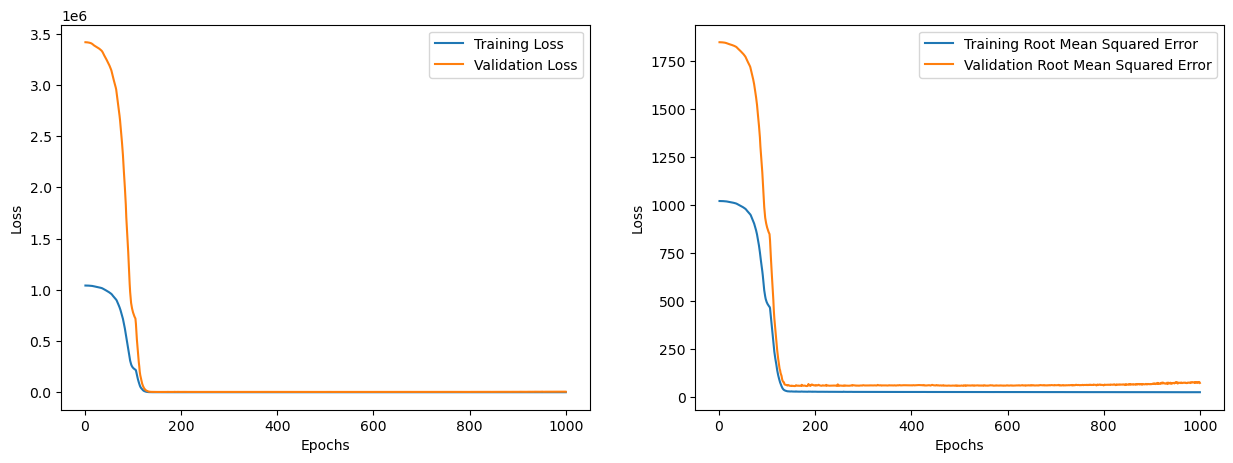

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Google

In [52]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


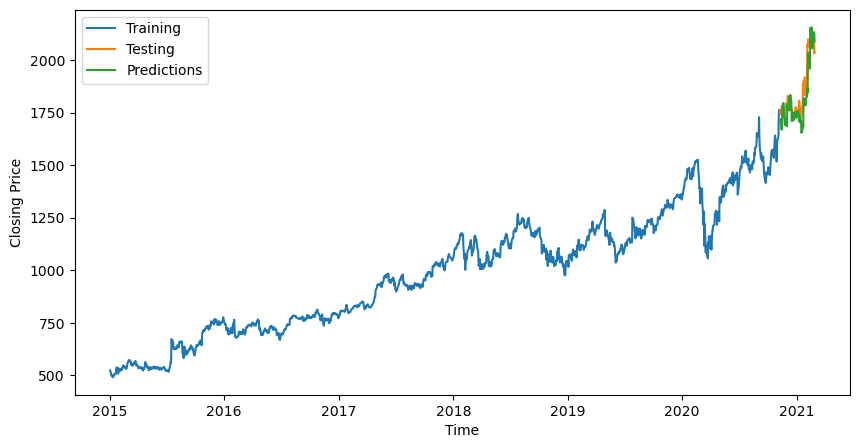

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'][GOOG['Date'] < '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] < '2020-11-07'], label = 'Training')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [54]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 72.55313917731253
MAPE: 0.02939768398385195


### Microsoft

In [55]:
MSFT.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  46.66  47.42  46.54  46.76       41.44  27913900.0
1  2015-01-05  46.37  46.73  46.25  46.33       41.06  39673900.0
2  2015-01-06  46.38  46.75  45.54  45.65       40.46  36447900.0
3  2015-01-07  45.98  46.46  45.49  46.23       40.97  29114100.0
4  2015-01-08  46.75  47.75  46.72  47.59       42.18  29645200.0

In [56]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [57]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [58]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

### Model Fitting

In [59]:
MSFT_Model = Model()

In [61]:
from tensorflow.keras.metrics import RootMeanSquaredError

MSFT_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [62]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 10360.8418 - root_mean_squared_error: 101.7150 - val_loss: 48746.8867 - val_root_mean_squared_error: 220.7870 - learning_rate: 0.0000e+00
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10695.0352 - root_mean_squared_error: 103.4153 - val_loss: 48745.9023 - val_root_mean_squared_error: 220.7847 - learning_rate: 6.6667e-08
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11170.0518 - root_mean_squared_error: 105.6346 - val_loss: 48743.9414 - val_root_mean_squared_error: 220.7803 - learning_rate: 1.3333e-07
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10323.1328 - root_mean_squared_error: 101.5732 - val_loss: 48741.0469 - val_root_mean_squared_error: 220.7737 - learning_rate: 2.0000e-07
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9852.1484 - root_mean_squared_error: 99.1880 - val_loss: 48737.2070 - val_root_mean_squared_error: 220.7650 - learning_rate: 2.6667e-07
Epoch 6/1000
9/9 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10358.2441 - root_mean_squared_error: 101.5352 - val_loss: 41609.7852 - val_root_mean_squared_error: 203.9848 - learning_rate: 4.6667e-06
Epoch 72/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8878.6318 - root_mean_squared_error: 94.2000 - val_loss: 41201.9883 - val_root_mean_squared_error: 202.9827 - learning_rate: 4.7333e-06
Epoch 73/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9116.4189 - root_mean_squared_error: 95.4555 - val_loss: 40755.7969 - val_root_mean_squared_error: 201.8806 - learning_rate: 4.8000e-06
Epoch 74/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8502.1240 - root_mean_squared_error: 92.1779 - val_loss: 40295.8359 - val_root_mean_squared_error: 200.7382 - learning_rate: 4.8667e-06
Epoch 75/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9739.1240 - root_mean_squared_error: 98.5973 - val_loss: 39777.5625 - val_root_mean_squared_error: 199.4431 - learning_rate: 4.9333e-06
Epoch 76/1000
9/9 ━━━━━━━━━━━━━━

Epoch 107/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 188.8445 - root_mean_squared_error: 13.7315 - val_loss: 450.8936 - val_root_mean_squared_error: 21.2343 - learning_rate: 7.0667e-06
Epoch 108/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 118.1931 - root_mean_squared_error: 10.8618 - val_loss: 261.0072 - val_root_mean_squared_error: 16.1557 - learning_rate: 7.1333e-06
Epoch 109/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.4762 - root_mean_squared_error: 8.4990 - val_loss: 176.4042 - val_root_mean_squared_error: 13.2817 - learning_rate: 7.2000e-06
Epoch 110/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.9799 - root_mean_squared_error: 6.9231 - val_loss: 134.4743 - val_root_mean_squared_error: 11.5963 - learning_rate: 7.2667e-06
Epoch 111/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.9936 - root_mean_squared_error: 6.0779 - val_loss: 108.2243 - val_root_mean_squared_error: 10.4031 - learning_rate: 7.3333e-06
Epoch 112/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 144/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.8057 - root_mean_squared_error: 3.9560 - val_loss: 55.9307 - val_root_mean_squared_error: 7.4787 - learning_rate: 9.5333e-06
Epoch 145/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.5010 - root_mean_squared_error: 4.0452 - val_loss: 57.1739 - val_root_mean_squared_error: 7.5613 - learning_rate: 9.6000e-06
Epoch 146/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.6764 - root_mean_squared_error: 4.0508 - val_loss: 56.5893 - val_root_mean_squared_error: 7.5226 - learning_rate: 9.6667e-06
Epoch 147/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6902 - root_mean_squared_error: 4.0679 - val_loss: 56.2505 - val_root_mean_squared_error: 7.5000 - learning_rate: 9.7333e-06
Epoch 148/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.7329 - root_mean_squared_error: 3.9211 - val_loss: 55.8846 - val_root_mean_squared_error: 7.4756 - learning_rate: 9.8000e-06
Epoch 149/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

Epoch 181/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.4515 - root_mean_squared_error: 3.5130 - val_loss: 49.8795 - val_root_mean_squared_error: 7.0625 - learning_rate: 7.4082e-06
Epoch 182/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.1852 - root_mean_squared_error: 3.6007 - val_loss: 49.7765 - val_root_mean_squared_error: 7.0552 - learning_rate: 7.3345e-06
Epoch 183/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.1862 - root_mean_squared_error: 4.1414 - val_loss: 49.1614 - val_root_mean_squared_error: 7.0115 - learning_rate: 7.2615e-06
Epoch 184/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.2178 - root_mean_squared_error: 3.4520 - val_loss: 49.2442 - val_root_mean_squared_error: 7.0174 - learning_rate: 7.1892e-06
Epoch 185/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.3557 - root_mean_squared_error: 4.0420 - val_loss: 49.8240 - val_root_mean_squared_error: 7.0586 - learning_rate: 7.1177e-06
Epoch 186/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

Epoch 218/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.8991 - root_mean_squared_error: 4.1008 - val_loss: 44.8919 - val_root_mean_squared_error: 6.7001 - learning_rate: 5.1171e-06
Epoch 219/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2310 - root_mean_squared_error: 3.8834 - val_loss: 44.6772 - val_root_mean_squared_error: 6.6841 - learning_rate: 5.0662e-06
Epoch 220/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2899 - root_mean_squared_error: 3.8978 - val_loss: 44.3208 - val_root_mean_squared_error: 6.6574 - learning_rate: 5.0158e-06
Epoch 221/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.9343 - root_mean_squared_error: 4.1033 - val_loss: 44.2444 - val_root_mean_squared_error: 6.6516 - learning_rate: 4.9659e-06
Epoch 222/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.7306 - root_mean_squared_error: 3.8334 - val_loss: 44.6470 - val_root_mean_squared_error: 6.6818 - learning_rate: 4.9164e-06
Epoch 223/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

Epoch 255/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8409 - root_mean_squared_error: 3.5748 - val_loss: 40.8879 - val_root_mean_squared_error: 6.3944 - learning_rate: 3.5345e-06
Epoch 256/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.9895 - root_mean_squared_error: 3.5922 - val_loss: 40.6307 - val_root_mean_squared_error: 6.3742 - learning_rate: 3.4994e-06
Epoch 257/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.6699 - root_mean_squared_error: 4.0683 - val_loss: 40.9760 - val_root_mean_squared_error: 6.4012 - learning_rate: 3.4646e-06
Epoch 258/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.7147 - root_mean_squared_error: 3.8311 - val_loss: 40.7692 - val_root_mean_squared_error: 6.3851 - learning_rate: 3.4301e-06
Epoch 259/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7404 - root_mean_squared_error: 3.4177 - val_loss: 40.3827 - val_root_mean_squared_error: 6.3547 - learning_rate: 3.3960e-06
Epoch 260/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

Epoch 292/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.3318 - root_mean_squared_error: 4.0136 - val_loss: 38.1387 - val_root_mean_squared_error: 6.1757 - learning_rate: 2.4414e-06
Epoch 293/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.3951 - root_mean_squared_error: 3.3561 - val_loss: 38.1077 - val_root_mean_squared_error: 6.1731 - learning_rate: 2.4171e-06
Epoch 294/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.8516 - root_mean_squared_error: 3.8461 - val_loss: 38.2741 - val_root_mean_squared_error: 6.1866 - learning_rate: 2.3931e-06
Epoch 295/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1780 - root_mean_squared_error: 3.4868 - val_loss: 37.9999 - val_root_mean_squared_error: 6.1644 - learning_rate: 2.3693e-06
Epoch 296/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2575 - root_mean_squared_error: 3.3469 - val_loss: 38.0351 - val_root_mean_squared_error: 6.1673 - learning_rate: 2.3457e-06
Epoch 297/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - 

Epoch 329/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6113 - root_mean_squared_error: 3.5323 - val_loss: 36.7341 - val_root_mean_squared_error: 6.0609 - learning_rate: 1.6864e-06
Epoch 330/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9930 - root_mean_squared_error: 3.4507 - val_loss: 36.6374 - val_root_mean_squared_error: 6.0529 - learning_rate: 1.6696e-06
Epoch 331/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4924 - root_mean_squared_error: 3.3848 - val_loss: 36.8041 - val_root_mean_squared_error: 6.0666 - learning_rate: 1.6530e-06
Epoch 332/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.2516 - root_mean_squared_error: 3.7432 - val_loss: 36.5802 - val_root_mean_squared_error: 6.0482 - learning_rate: 1.6365e-06
Epoch 333/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6763 - root_mean_squared_error: 3.5555 - val_loss: 36.4800 - val_root_mean_squared_error: 6.0399 - learning_rate: 1.6203e-06
Epoch 334/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

Epoch 366/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1339 - root_mean_squared_error: 3.1669 - val_loss: 35.8837 - val_root_mean_squared_error: 5.9903 - learning_rate: 1.1648e-06
Epoch 367/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4128 - root_mean_squared_error: 3.3763 - val_loss: 35.8323 - val_root_mean_squared_error: 5.9860 - learning_rate: 1.1533e-06
Epoch 368/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8511 - root_mean_squared_error: 3.4213 - val_loss: 35.8892 - val_root_mean_squared_error: 5.9908 - learning_rate: 1.1418e-06
Epoch 369/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1686 - root_mean_squared_error: 3.1450 - val_loss: 35.8913 - val_root_mean_squared_error: 5.9909 - learning_rate: 1.1304e-06
Epoch 370/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.6853 - root_mean_squared_error: 3.8207 - val_loss: 35.8462 - val_root_mean_squared_error: 5.9872 - learning_rate: 1.1192e-06
Epoch 371/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

Epoch 403/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6282 - root_mean_squared_error: 3.2480 - val_loss: 35.4537 - val_root_mean_squared_error: 5.9543 - learning_rate: 1.0000e-06
Epoch 404/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.5653 - root_mean_squared_error: 3.8025 - val_loss: 35.4108 - val_root_mean_squared_error: 5.9507 - learning_rate: 1.0000e-06
Epoch 405/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0849 - root_mean_squared_error: 3.4738 - val_loss: 35.3298 - val_root_mean_squared_error: 5.9439 - learning_rate: 1.0000e-06
Epoch 406/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9837 - root_mean_squared_error: 3.5960 - val_loss: 35.3860 - val_root_mean_squared_error: 5.9486 - learning_rate: 1.0000e-06
Epoch 407/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.9410 - root_mean_squared_error: 3.2934 - val_loss: 35.3662 - val_root_mean_squared_error: 5.9469 - learning_rate: 1.0000e-06
Epoch 408/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

Epoch 440/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.6504 - root_mean_squared_error: 3.6883 - val_loss: 34.9209 - val_root_mean_squared_error: 5.9094 - learning_rate: 1.0000e-06
Epoch 441/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.4159 - root_mean_squared_error: 3.3694 - val_loss: 34.8487 - val_root_mean_squared_error: 5.9033 - learning_rate: 1.0000e-06
Epoch 442/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0692 - root_mean_squared_error: 3.5962 - val_loss: 34.9622 - val_root_mean_squared_error: 5.9129 - learning_rate: 1.0000e-06
Epoch 443/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.2004 - root_mean_squared_error: 3.3344 - val_loss: 34.8286 - val_root_mean_squared_error: 5.9016 - learning_rate: 1.0000e-06
Epoch 444/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.8107 - root_mean_squared_error: 3.4348 - val_loss: 34.9241 - val_root_mean_squared_error: 5.9097 - learning_rate: 1.0000e-06
Epoch 445/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - 

Epoch 477/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3418 - root_mean_squared_error: 3.3654 - val_loss: 34.4949 - val_root_mean_squared_error: 5.8732 - learning_rate: 1.0000e-06
Epoch 478/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.1612 - root_mean_squared_error: 3.3381 - val_loss: 34.2903 - val_root_mean_squared_error: 5.8558 - learning_rate: 1.0000e-06
Epoch 479/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8869 - root_mean_squared_error: 3.1384 - val_loss: 34.2021 - val_root_mean_squared_error: 5.8483 - learning_rate: 1.0000e-06
Epoch 480/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9711 - root_mean_squared_error: 3.4583 - val_loss: 34.3711 - val_root_mean_squared_error: 5.8627 - learning_rate: 1.0000e-06
Epoch 481/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9689 - root_mean_squared_error: 3.3046 - val_loss: 34.3892 - val_root_mean_squared_error: 5.8642 - learning_rate: 1.0000e-06
Epoch 482/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - l

Epoch 514/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.5003 - root_mean_squared_error: 3.0695 - val_loss: 33.9402 - val_root_mean_squared_error: 5.8258 - learning_rate: 1.0000e-06
Epoch 515/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.6983 - root_mean_squared_error: 3.5571 - val_loss: 33.6762 - val_root_mean_squared_error: 5.8031 - learning_rate: 1.0000e-06
Epoch 516/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6428 - root_mean_squared_error: 3.5464 - val_loss: 33.7976 - val_root_mean_squared_error: 5.8136 - learning_rate: 1.0000e-06
Epoch 517/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.1499 - root_mean_squared_error: 3.4826 - val_loss: 34.0764 - val_root_mean_squared_error: 5.8375 - learning_rate: 1.0000e-06
Epoch 518/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.3244 - root_mean_squared_error: 3.2068 - val_loss: 33.7474 - val_root_mean_squared_error: 5.8093 - learning_rate: 1.0000e-06
Epoch 519/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - l

Epoch 551/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.9743 - root_mean_squared_error: 3.5876 - val_loss: 33.4139 - val_root_mean_squared_error: 5.7805 - learning_rate: 1.0000e-06
Epoch 552/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.6755 - root_mean_squared_error: 3.2612 - val_loss: 33.3580 - val_root_mean_squared_error: 5.7756 - learning_rate: 1.0000e-06
Epoch 553/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5287 - root_mean_squared_error: 3.0784 - val_loss: 33.1879 - val_root_mean_squared_error: 5.7609 - learning_rate: 1.0000e-06
Epoch 554/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.8517 - root_mean_squared_error: 3.2908 - val_loss: 33.3310 - val_root_mean_squared_error: 5.7733 - learning_rate: 1.0000e-06
Epoch 555/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9536 - root_mean_squared_error: 3.5929 - val_loss: 33.3950 - val_root_mean_squared_error: 5.7788 - learning_rate: 1.0000e-06
Epoch 556/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - l

Epoch 588/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1925 - root_mean_squared_error: 3.0019 - val_loss: 32.7448 - val_root_mean_squared_error: 5.7223 - learning_rate: 1.0000e-06
Epoch 589/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.0490 - root_mean_squared_error: 3.3079 - val_loss: 32.8611 - val_root_mean_squared_error: 5.7325 - learning_rate: 1.0000e-06
Epoch 590/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7274 - root_mean_squared_error: 3.2699 - val_loss: 32.8635 - val_root_mean_squared_error: 5.7327 - learning_rate: 1.0000e-06
Epoch 591/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8395 - root_mean_squared_error: 2.9667 - val_loss: 32.8524 - val_root_mean_squared_error: 5.7317 - learning_rate: 1.0000e-06
Epoch 592/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3185 - root_mean_squared_error: 3.0429 - val_loss: 32.7674 - val_root_mean_squared_error: 5.7243 - learning_rate: 1.0000e-06
Epoch 593/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 625/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4591 - root_mean_squared_error: 3.0368 - val_loss: 32.5103 - val_root_mean_squared_error: 5.7018 - learning_rate: 1.0000e-06
Epoch 626/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7922 - root_mean_squared_error: 3.0777 - val_loss: 32.4488 - val_root_mean_squared_error: 5.6964 - learning_rate: 1.0000e-06
Epoch 627/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.4748 - root_mean_squared_error: 3.3734 - val_loss: 32.3228 - val_root_mean_squared_error: 5.6853 - learning_rate: 1.0000e-06
Epoch 628/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0847 - root_mean_squared_error: 3.1658 - val_loss: 32.4106 - val_root_mean_squared_error: 5.6930 - learning_rate: 1.0000e-06
Epoch 629/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9501 - root_mean_squared_error: 3.4498 - val_loss: 32.5369 - val_root_mean_squared_error: 5.7041 - learning_rate: 1.0000e-06
Epoch 630/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

Epoch 662/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6674 - root_mean_squared_error: 3.1058 - val_loss: 32.1649 - val_root_mean_squared_error: 5.6714 - learning_rate: 1.0000e-06
Epoch 663/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8771 - root_mean_squared_error: 3.2962 - val_loss: 32.2927 - val_root_mean_squared_error: 5.6827 - learning_rate: 1.0000e-06
Epoch 664/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7046 - root_mean_squared_error: 3.0998 - val_loss: 31.9916 - val_root_mean_squared_error: 5.6561 - learning_rate: 1.0000e-06
Epoch 665/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0642 - root_mean_squared_error: 3.3174 - val_loss: 32.0440 - val_root_mean_squared_error: 5.6607 - learning_rate: 1.0000e-06
Epoch 666/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0373 - root_mean_squared_error: 3.0014 - val_loss: 32.0712 - val_root_mean_squared_error: 5.6631 - learning_rate: 1.0000e-06
Epoch 667/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 699/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8039 - root_mean_squared_error: 3.2783 - val_loss: 31.9320 - val_root_mean_squared_error: 5.6508 - learning_rate: 1.0000e-06
Epoch 700/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7932 - root_mean_squared_error: 2.9607 - val_loss: 31.7914 - val_root_mean_squared_error: 5.6384 - learning_rate: 1.0000e-06
Epoch 701/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2191 - root_mean_squared_error: 3.0337 - val_loss: 31.7405 - val_root_mean_squared_error: 5.6339 - learning_rate: 1.0000e-06
Epoch 702/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7598 - root_mean_squared_error: 3.1180 - val_loss: 32.0166 - val_root_mean_squared_error: 5.6583 - learning_rate: 1.0000e-06
Epoch 703/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9204 - root_mean_squared_error: 2.9771 - val_loss: 31.9156 - val_root_mean_squared_error: 5.6494 - learning_rate: 1.0000e-06
Epoch 704/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss

Epoch 736/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3160 - root_mean_squared_error: 3.0498 - val_loss: 31.7408 - val_root_mean_squared_error: 5.6339 - learning_rate: 1.0000e-06
Epoch 737/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3089 - root_mean_squared_error: 2.8666 - val_loss: 31.7428 - val_root_mean_squared_error: 5.6341 - learning_rate: 1.0000e-06
Epoch 738/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.3313 - root_mean_squared_error: 3.3617 - val_loss: 31.6154 - val_root_mean_squared_error: 5.6228 - learning_rate: 1.0000e-06
Epoch 739/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2112 - root_mean_squared_error: 2.8372 - val_loss: 31.8273 - val_root_mean_squared_error: 5.6416 - learning_rate: 1.0000e-06
Epoch 740/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6394 - root_mean_squared_error: 2.9305 - val_loss: 31.6491 - val_root_mean_squared_error: 5.6258 - learning_rate: 1.0000e-06
Epoch 741/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss

Epoch 773/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4722 - root_mean_squared_error: 3.3742 - val_loss: 31.5700 - val_root_mean_squared_error: 5.6187 - learning_rate: 1.0000e-06
Epoch 774/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4885 - root_mean_squared_error: 3.0793 - val_loss: 31.7035 - val_root_mean_squared_error: 5.6306 - learning_rate: 1.0000e-06
Epoch 775/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.7458 - root_mean_squared_error: 3.1189 - val_loss: 31.4726 - val_root_mean_squared_error: 5.6100 - learning_rate: 1.0000e-06
Epoch 776/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8089 - root_mean_squared_error: 2.9476 - val_loss: 31.6182 - val_root_mean_squared_error: 5.6230 - learning_rate: 1.0000e-06
Epoch 777/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8664 - root_mean_squared_error: 3.4323 - val_loss: 31.4645 - val_root_mean_squared_error: 5.6093 - learning_rate: 1.0000e-06
Epoch 778/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 810/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7606 - root_mean_squared_error: 2.7651 - val_loss: 31.3104 - val_root_mean_squared_error: 5.5956 - learning_rate: 1.0000e-06
Epoch 811/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5804 - root_mean_squared_error: 2.9028 - val_loss: 31.2669 - val_root_mean_squared_error: 5.5917 - learning_rate: 1.0000e-06
Epoch 812/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4238 - root_mean_squared_error: 3.2210 - val_loss: 31.3342 - val_root_mean_squared_error: 5.5977 - learning_rate: 1.0000e-06
Epoch 813/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7204 - root_mean_squared_error: 2.9426 - val_loss: 31.5674 - val_root_mean_squared_error: 5.6185 - learning_rate: 1.0000e-06
Epoch 814/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9529 - root_mean_squared_error: 2.9851 - val_loss: 31.2867 - val_root_mean_squared_error: 5.5934 - learning_rate: 1.0000e-06
Epoch 815/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss

Epoch 847/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.7847 - root_mean_squared_error: 3.4173 - val_loss: 31.0280 - val_root_mean_squared_error: 5.5703 - learning_rate: 1.0000e-06
Epoch 848/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.2902 - root_mean_squared_error: 3.3321 - val_loss: 31.2627 - val_root_mean_squared_error: 5.5913 - learning_rate: 1.0000e-06
Epoch 849/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6062 - root_mean_squared_error: 3.0812 - val_loss: 30.9706 - val_root_mean_squared_error: 5.5651 - learning_rate: 1.0000e-06
Epoch 850/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7746 - root_mean_squared_error: 3.1199 - val_loss: 31.1009 - val_root_mean_squared_error: 5.5768 - learning_rate: 1.0000e-06
Epoch 851/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3434 - root_mean_squared_error: 3.0518 - val_loss: 31.0323 - val_root_mean_squared_error: 5.5707 - learning_rate: 1.0000e-06
Epoch 852/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - los

Epoch 884/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0269 - root_mean_squared_error: 3.3102 - val_loss: 31.0534 - val_root_mean_squared_error: 5.5726 - learning_rate: 1.0000e-06
Epoch 885/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6649 - root_mean_squared_error: 3.1009 - val_loss: 30.8825 - val_root_mean_squared_error: 5.5572 - learning_rate: 1.0000e-06
Epoch 886/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4207 - root_mean_squared_error: 2.8965 - val_loss: 31.0307 - val_root_mean_squared_error: 5.5705 - learning_rate: 1.0000e-06
Epoch 887/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8284 - root_mean_squared_error: 2.9699 - val_loss: 30.8243 - val_root_mean_squared_error: 5.5520 - learning_rate: 1.0000e-06
Epoch 888/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.5173 - root_mean_squared_error: 3.0830 - val_loss: 31.2793 - val_root_mean_squared_error: 5.5928 - learning_rate: 1.0000e-06
Epoch 889/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss

Epoch 921/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7254 - root_mean_squared_error: 3.1135 - val_loss: 30.8172 - val_root_mean_squared_error: 5.5513 - learning_rate: 1.0000e-06
Epoch 922/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7964 - root_mean_squared_error: 3.2779 - val_loss: 31.0238 - val_root_mean_squared_error: 5.5699 - learning_rate: 1.0000e-06
Epoch 923/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6784 - root_mean_squared_error: 3.2573 - val_loss: 31.2753 - val_root_mean_squared_error: 5.5924 - learning_rate: 1.0000e-06
Epoch 924/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.7317 - root_mean_squared_error: 2.9440 - val_loss: 30.9231 - val_root_mean_squared_error: 5.5609 - learning_rate: 1.0000e-06
Epoch 925/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8475 - root_mean_squared_error: 3.1276 - val_loss: 30.9243 - val_root_mean_squared_error: 5.5610 - learning_rate: 1.0000e-06
Epoch 926/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - los

Epoch 958/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5879 - root_mean_squared_error: 2.7498 - val_loss: 30.8992 - val_root_mean_squared_error: 5.5587 - learning_rate: 1.0000e-06
Epoch 959/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4635 - root_mean_squared_error: 2.7240 - val_loss: 30.6140 - val_root_mean_squared_error: 5.5330 - learning_rate: 1.0000e-06
Epoch 960/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6421 - root_mean_squared_error: 3.0699 - val_loss: 31.0017 - val_root_mean_squared_error: 5.5679 - learning_rate: 1.0000e-06
Epoch 961/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8767 - root_mean_squared_error: 2.9709 - val_loss: 30.9877 - val_root_mean_squared_error: 5.5667 - learning_rate: 1.0000e-06
Epoch 962/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6540 - root_mean_squared_error: 2.9395 - val_loss: 30.9252 - val_root_mean_squared_error: 5.5610 - learning_rate: 1.0000e-06
Epoch 963/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 995/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.6177 - root_mean_squared_error: 2.7509 - val_loss: 30.9210 - val_root_mean_squared_error: 5.5607 - learning_rate: 1.0000e-06
Epoch 996/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1458 - root_mean_squared_error: 3.0205 - val_loss: 30.9041 - val_root_mean_squared_error: 5.5591 - learning_rate: 1.0000e-06
Epoch 997/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.0767 - root_mean_squared_error: 2.8196 - val_loss: 30.9732 - val_root_mean_squared_error: 5.5654 - learning_rate: 1.0000e-06
Epoch 998/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2387 - root_mean_squared_error: 3.1928 - val_loss: 30.6145 - val_root_mean_squared_error: 5.5330 - learning_rate: 1.0000e-06
Epoch 999/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.3732 - root_mean_squared_error: 2.6925 - val_loss: 30.6668 - val_root_mean_squared_error: 5.5378 - learning_rate: 1.0000e-06
Epoch 1000/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - los

In [63]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

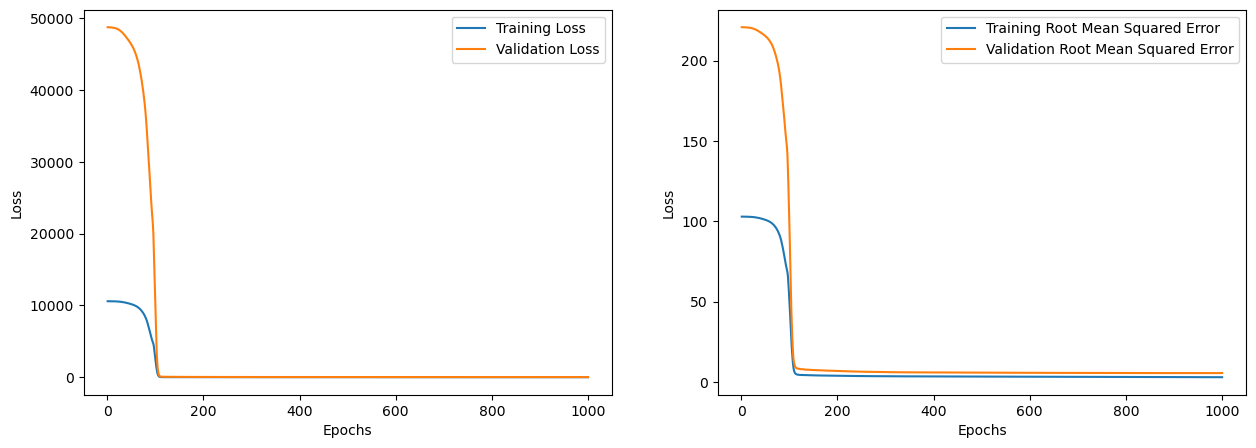

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [65]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


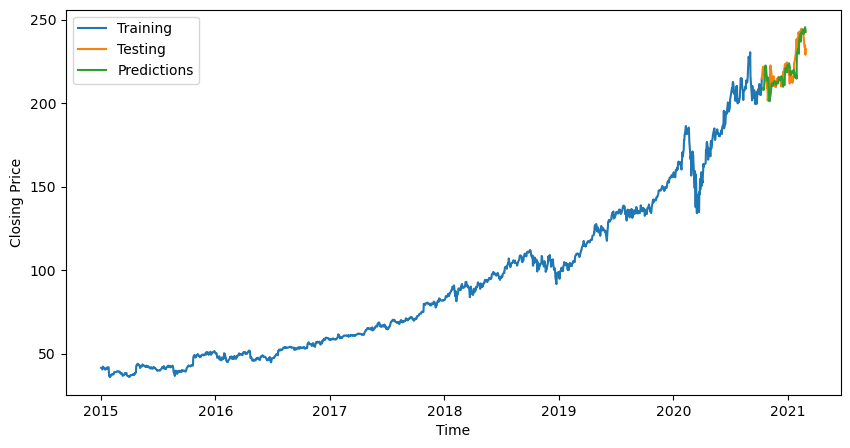

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [67]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.591604951927695
MAPE: 0.01816878984283811


### Amazon

In [68]:
AMZN.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  312.58  314.75  306.96  308.52      308.52  2783200.0
1  2015-01-05  307.01  308.38  300.85  302.19      302.19  2774200.0
2  2015-01-06  302.24  303.00  292.38  295.29      295.29  3519000.0
3  2015-01-07  297.50  301.28  295.33  298.42      298.42  2640300.0
4  2015-01-08  300.32  303.14  296.11  300.46      300.46  3088400.0

In [69]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [70]:
# Change Dtype of Date column
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [71]:
AMZN_Date = '2020-11-01'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN, AMZN_Date)

### Model Fitting

In [72]:
AMZN_Model = Model()

In [74]:
from tensorflow.keras.metrics import RootMeanSquaredError

AMZN_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [75]:
AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2283140.7500 - root_mean_squared_error: 1510.4940 - val_loss: 9901911.0000 - val_root_mean_squared_error: 3146.7302 - learning_rate: 0.0000e+00
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2136660.0000 - root_mean_squared_error: 1460.9268 - val_loss: 9901457.0000 - val_root_mean_squared_error: 3146.6580 - learning_rate: 6.6667e-08
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2243904.7500 - root_mean_squared_error: 1497.9110 - val_loss: 9900606.0000 - val_root_mean_squared_error: 3146.5229 - learning_rate: 1.3333e-07
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2063297.8750 - root_mean_squared_error: 1435.9014 - val_loss: 9899357.0000 - val_root_mean_squared_error: 3146.3245 - learning_rate: 2.0000e-07
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2021475.7500 - root_mean_squared_error: 1419.7753 - val_loss: 9897566.0000 - val_root_mean_squared_error: 3146.0398 - learni

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1947829.6250 - root_mean_squared_error: 1394.9088 - val_loss: 8661559.0000 - val_root_mean_squared_error: 2943.0527 - learning_rate: 4.5333e-06
Epoch 70/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1921083.1250 - root_mean_squared_error: 1385.8588 - val_loss: 8608068.0000 - val_root_mean_squared_error: 2933.9509 - learning_rate: 4.6000e-06
Epoch 71/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1890505.8750 - root_mean_squared_error: 1374.3911 - val_loss: 8552240.0000 - val_root_mean_squared_error: 2924.4214 - learning_rate: 4.6667e-06
Epoch 72/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1861487.0000 - root_mean_squared_error: 1363.6765 - val_loss: 8499827.0000 - val_root_mean_squared_error: 2915.4463 - learning_rate: 4.7333e-06
Epoch 73/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1884502.8750 - root_mean_squared_error: 1372.0823 - val_loss: 8444194.0000 - val_root_mean_squared_error: 2905.8896 - learning_rate:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3025.1431 - root_mean_squared_error: 54.7003 - val_loss: 13029.1230 - val_root_mean_squared_error: 114.1452 - learning_rate: 9.1333e-06
Epoch 139/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3435.1714 - root_mean_squared_error: 58.5681 - val_loss: 13010.6631 - val_root_mean_squared_error: 114.0643 - learning_rate: 9.2000e-06
Epoch 140/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3784.0557 - root_mean_squared_error: 61.2367 - val_loss: 12378.2373 - val_root_mean_squared_error: 111.2575 - learning_rate: 9.2667e-06
Epoch 141/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3891.0911 - root_mean_squared_error: 62.2537 - val_loss: 10975.1455 - val_root_mean_squared_error: 104.7623 - learning_rate: 9.3333e-06
Epoch 142/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4131.0166 - root_mean_squared_error: 63.9387 - val_loss: 10327.1777 - val_root_mean_squared_error: 101.6227 - learning_rate: 9.4000e-06
Epoch 143/200
10/10 ━━━━

In [76]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

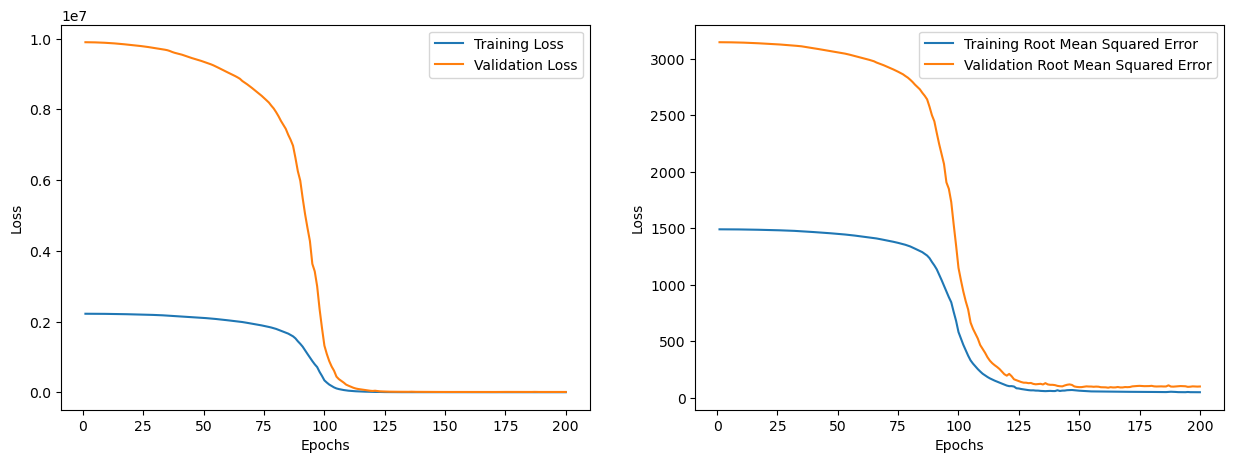

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [78]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


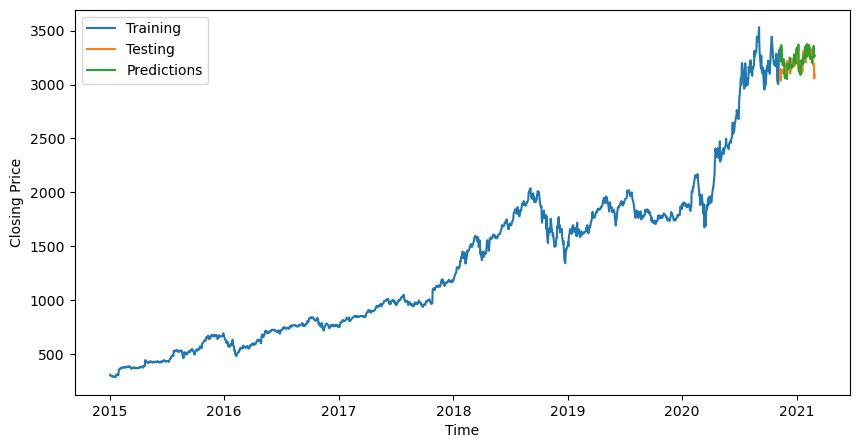

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'][AMZN['Date'] < '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] < '2020-11-07'], label = 'Training')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [80]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 99.3674563477245
MAPE: 0.02460723750896758


*********************************************************************************************************************
# Contribution  Code :


### Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
AAPL = pd.read_csv("Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("Database/Pre_Processed_AMZN.csv")

# Apple

In [3]:
# Convert Date column to datetime
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [4]:
# Extract the 'Adj. Close' column
data = AAPL['Adj. Close'].values.reshape(-1, 1)

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [7]:
# Define the number of time steps for LSTM
time_steps = 30

In [8]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [9]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [11]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0046 - val_loss: 2.3775e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9137e-04 - val_loss: 5.3095e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3151e-04 - val_loss: 7.8316e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5378e-04 - val_loss: 2.4419e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9221e-04 - val_loss: 6.1750e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5236e-04 - val_loss: 3.9838e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0904e-04 - val_loss: 3.2998e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7033e-04 - val_loss: 2.1217e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7402e-04 - val_loss: 2.2276e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4681e-04 - val_loss: 4.6780e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.

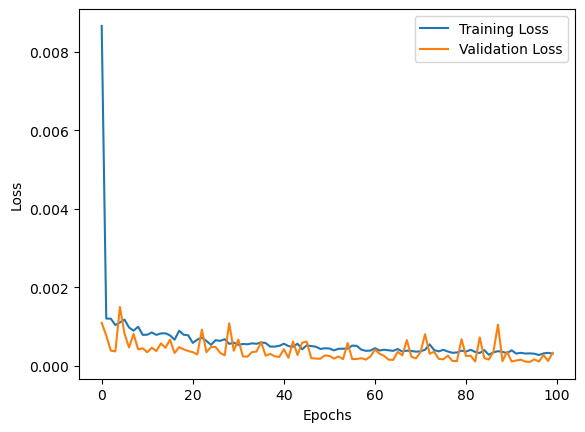

In [85]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [16]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

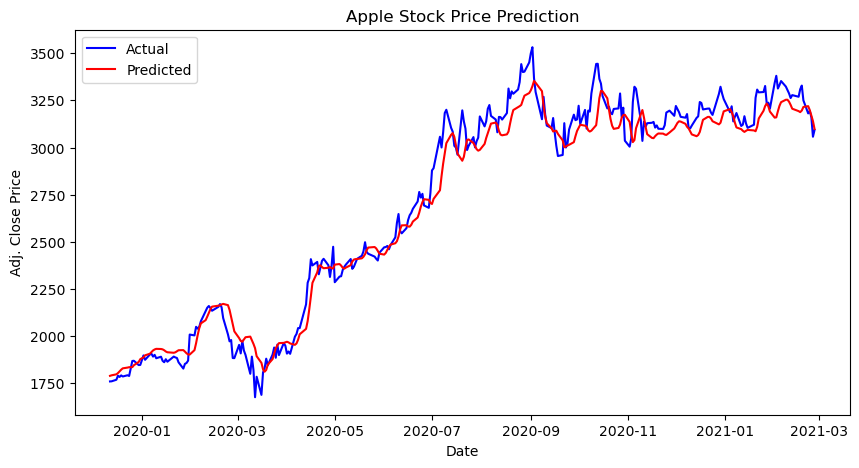

In [86]:
# Plotting the predictions for Apple dataset
plt.figure(figsize=(10, 5))
plt.plot(AAPL['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(AAPL['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

In [17]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 8.700268343972638


# Tesla

In [18]:
# Convert Date column to datetime
TSLA['Date'] = pd.to_datetime(TSLA['Date'])

In [19]:
# Extract the 'Adj. Close' column
data = TSLA['Adj. Close'].values.reshape(-1, 1)

In [20]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [21]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [22]:
# Define the number of time steps for LSTM
time_steps = 30

In [23]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [24]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [25]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [26]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.5984e-04 - val_loss: 3.8735e-05
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8596e-05 - val_loss: 2.6968e-05
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1938e-05 - val_loss: 2.2976e-05
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2737e-05 - val_loss: 3.3992e-05
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5879e-05 - val_loss: 3.9992e-05
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.6577e-05 - val_loss: 2.4672e-05
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.4562e-05 - val_loss: 1.9209e-05
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3396e-05 - val_loss: 2.8260e-05
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2314e-05 - val_loss: 1.7280e-05
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3892e-05 - val_loss: 2.0298e-05
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss

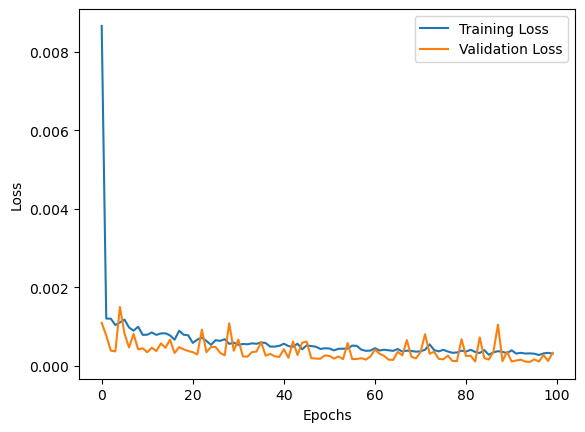

In [83]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [31]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

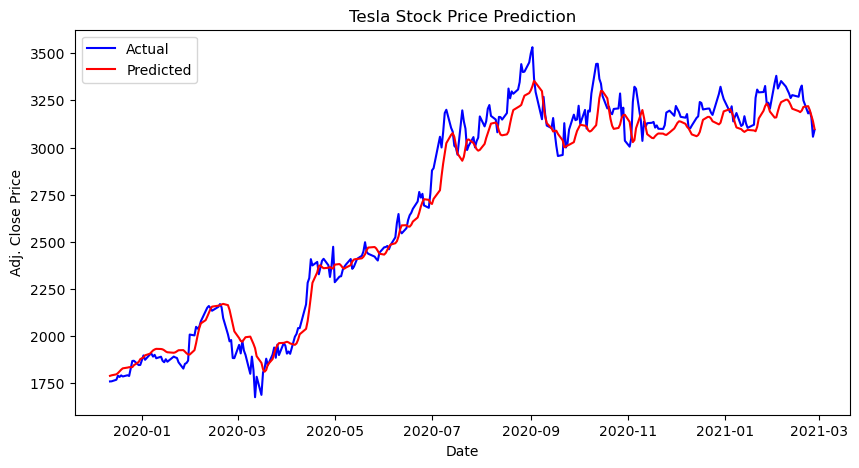

In [87]:
# Plotting the predictions for Tesla dataset
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(TSLA['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

In [32]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 32.18709424823176


# Google

In [33]:
# Convert Date column to datetime
GOOG['Date'] = pd.to_datetime(GOOG['Date'])

In [34]:
# Extract the 'Adj. Close' column
data = GOOG['Adj. Close'].values.reshape(-1, 1)

In [35]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [36]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [37]:
# Define the number of time steps for LSTM
time_steps = 30

In [38]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [39]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [40]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [41]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - val_loss: 0.0016
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 4.6216e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.4890e-04 - val_loss: 0.0011
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7754e-04 - val_loss: 0.0013
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 3.5626e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.0870e-04 - val_loss: 0.0015
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.7014e-04 - val_loss: 2.6625e-04
Epoch 12/100
35/35 ━━━━━

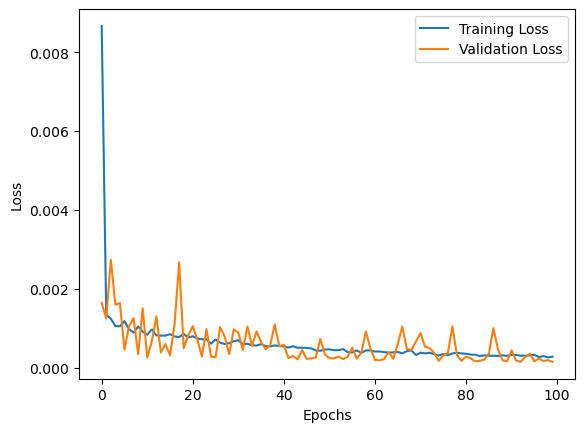

In [44]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [46]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

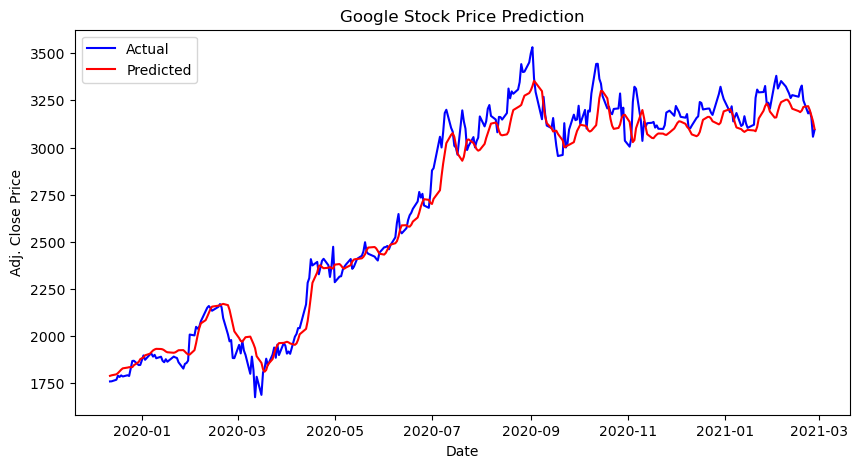

In [88]:
# Plotting the predictions for Google dataset
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(GOOG['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

In [47]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 45.52779542885159


# Microsoft

In [48]:
# Convert Date column to datetime
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

In [49]:
# Extract the 'Adj. Close' column
data = MSFT['Adj. Close'].values.reshape(-1, 1)

In [50]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [51]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [52]:
# Define the number of time steps for LSTM
time_steps = 30

In [53]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [54]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [55]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [56]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0149 - val_loss: 2.6445e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.0466e-04 - val_loss: 2.3786e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0681e-04 - val_loss: 0.0018
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.5091e-04 - val_loss: 1.8296e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6540e-04 - val_loss: 2.8309e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.4890e-04 - val_loss: 9.0658e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.6410e-04 - val_loss: 3.4792e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3846e-04 - val_loss: 2.6083e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9375e-04 - val_loss: 5.7183e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6655e-04 - val_loss: 7.8671e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5539

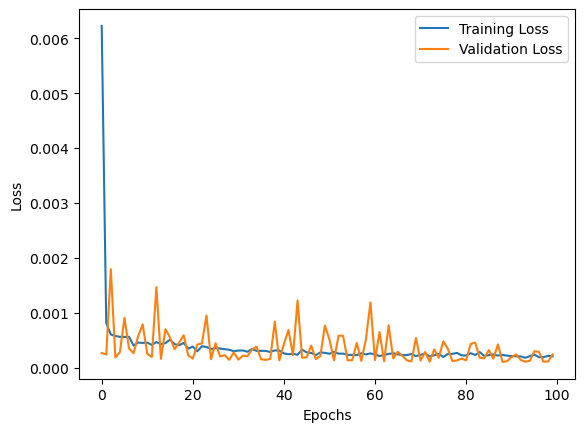

In [59]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [61]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

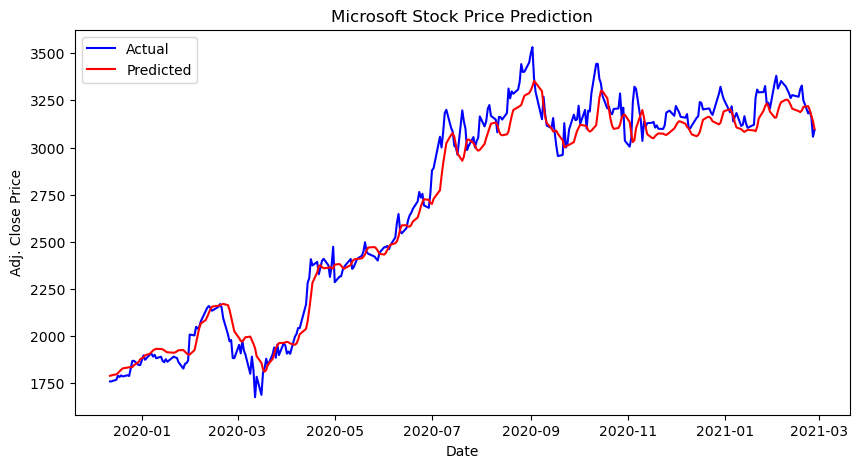

In [89]:
# Plotting the predictions for Microsoft dataset
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(MSFT['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.show()

In [62]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 6.602892829779307


# Amazon

In [63]:
# Convert Date column to datetime
AMZN['Date'] = pd.to_datetime(AMZN['Date'])

In [64]:
# Extract the 'Adj. Close' column
data = AMZN['Adj. Close'].values.reshape(-1, 1)

In [65]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [66]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [67]:
# Define the number of time steps for LSTM
time_steps = 30

In [68]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [69]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [70]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [71]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - val_loss: 0.0011
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 7.7207e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 3.8827e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7448e-04 - val_loss: 3.6920e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 8.2612e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - val_loss: 4.6830e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.7100e-04 - val_loss: 8.1206e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - val_loss: 4.2103e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.4640e-04 - val_loss: 4.4794e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8775e-04 - val_loss: 3.4709e-04


Epoch 65/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5503e-04 - val_loss: 1.5241e-04
Epoch 66/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0221e-04 - val_loss: 3.5890e-04
Epoch 67/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2843e-04 - val_loss: 2.6769e-04
Epoch 68/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7662e-04 - val_loss: 6.5618e-04
Epoch 69/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.9541e-04 - val_loss: 2.3226e-04
Epoch 70/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7313e-04 - val_loss: 1.8912e-04
Epoch 71/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8378e-04 - val_loss: 3.4803e-04
Epoch 72/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0885e-04 - val_loss: 8.0572e-04
Epoch 73/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0558e-04 - val_loss: 3.0794e-04
Epoch 74/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9591e-04 - val_loss: 3.5970e-04
Epoch 75/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/st

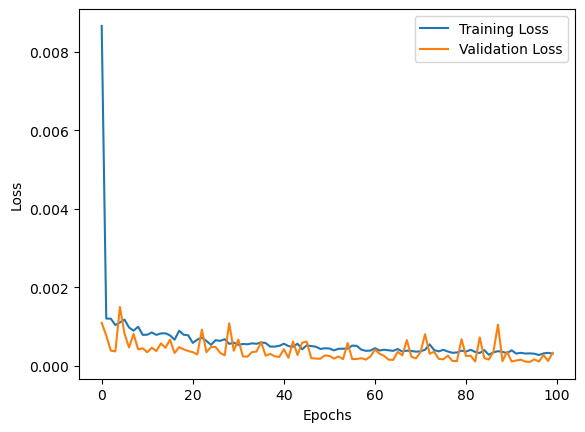

In [79]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [76]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

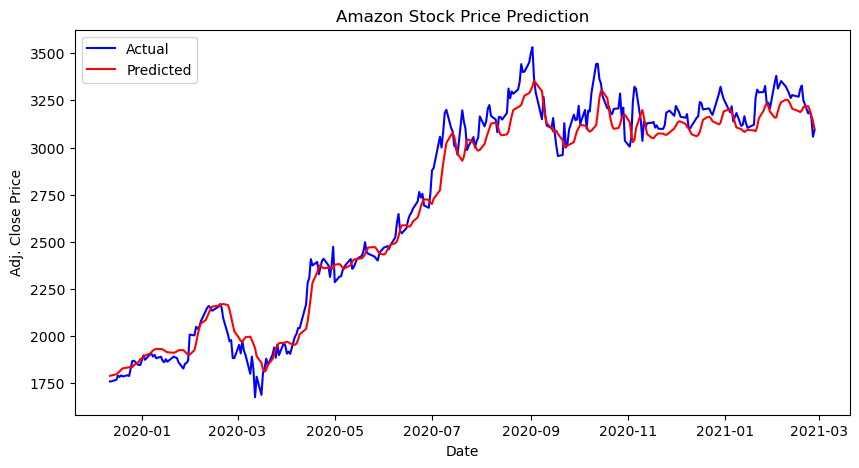

In [91]:
# Plotting the predictions for Amazon dataset
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(AMZN['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()

In [77]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 95.17480869340741


### Results :
*******************************************************************************************************************************

-Apple Dataset:
    Deep Learning Model: RMSE = 5.127
    ARIMA Model: RMSE = 12.484
    Neural Network Model: RMSE = 8.700
    
-Tesla Dataset:
    Deep Learning Model: RMSE = 92.161
    ARIMA Model: RMSE = 99.556
    Neural Network Model: RMSE = 45.528
    
    
-Google Dataset:
    Deep Learning Model: RMSE = 72.553
    ARIMA Model: RMSE = 265.883
    Neural Network Model: RMSE = 45.528
    
    
-Microsoft Dataset:
    Deep Learning Model: RMSE = 5.592
    ARIMA Model: RMSE = 16.195
    Neural Network Model: RMSE = 6.603
    
    
-Amazon Dataset:
    Deep Learning Model: RMSE = 99.367
    ARIMA Model: RMSE = 184.395
    Neural Network Model: RMSE = 95.175
    
    

#### Observations :
-The deep learning model generally outperforms or performs comparably to the ARIMA model in terms of RMSE across most datasets.
-The neural network model's performance varies across datasets but shows competitive performance, especially compared to the ARIMA model.
-The performance of each model can vary significantly depending on the dataset, indicating that no single model is universally superior across all scenarios.
*******************************************************************************************************************************
*


### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :
-Through this comparison, we gained insights into the performance of deep learning, ARIMA, and neural network models for stock price prediction.
-We learned how different models perform on various datasets and the importance of selecting the right model for a specific task.
*******************************************************************************************************************************
#### Results Discussion :
-The deep learning model consistently showed competitive performance across most datasets, often outperforming or performing comparably to the ARIMA model.
-Neural network models also exhibited promising results, showcasing their potential for stock price prediction tasks.
-The ARIMA model, while widely used, demonstrated mixed performance, with varying RMSE values across different datasets.

*******************************************************************************************************************************
#### Limitations :
-The evaluation was based solely on RMSE, which may not fully capture the nuances of model performance.
-The performance of the models may be influenced by factors such as hyperparameter tuning, feature selection, and dataset characteristics.
-The models' performance was evaluated on historical data, and their effectiveness in predicting future stock prices remains to be seen.

*******************************************************************************************************************************
#### Future Extension :
-Future research could explore additional evaluation metrics to provide a more comprehensive assessment of model performance.
-Further analysis could investigate ensemble methods or hybrid approaches that combine multiple models to improve prediction accuracy.
-Incorporating additional features, such as news sentiment analysis or macroeconomic indicators, could enhance the models' predictive capabilities.
-Deployment of the models in real-world trading scenarios and continuous monitoring of their performance could provide valuable insights into their practical utility.

# References

Mehtab, S. (2020, September 20). Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models. ArXiv.Org. https://arxiv.org/abs/2009.10819

Chauhan, N. S. (2020, January). Stock Market Forecasting Using Time Series Analysis. KDnuggets. https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html

Dev, U. (2020, June 21). EDA of Stock Market using Time Series - Usharbudha Dev. Medium. https://usharbudha-dev09.medium.com/eda-of-stock-market-using-time-series-9662fd18bfc5